# Project Code Check In #2


### Topic: Stellar Merger Remnant between MW and M31

Question that I will be addressing in the code: What class of galaxy will the merger of M31 and MW most closely resemble?


Outline for this code: In order to look at what class of galaxy the merger will result in, I will be doing two different plots:
1. Plotting the Sersic Profile of the stellar disk particles of M31 and MW. For both of these profiles I will be looking at how they compare to the profile for an elliptical galaxy and a spiral galaxy
2. Plotting the x and y position of the stellar disk particles of M31 and MW. I will be using this to do a visual comparison of what the merger looks like compared to the sersic profile given
    - note: at the moment for both of these galaxies I am only considering the stellar disk
3. These plots will be shown side by side and in a movie/gif format in order to show the viewer over time how the sersic profile changes with what we see visually in the x and y position

In [1]:
#Load in modules needed for project

import numpy as np
import astropy.units as u

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import LogNorm
#from mpl_toolkits.mplot3d import Axes3D
#from matplotlib import cm
%matplotlib inline
from matplotlib.animation import FFMpegWriter
from matplotlib.animation import FuncAnimation
##FFMpeg

# my modules from previous code
from ReadFile import Read
from CenterOfMass import CenterOfMass
from MassProfile import MassProfile

# Part 1: Data for plots in for loop

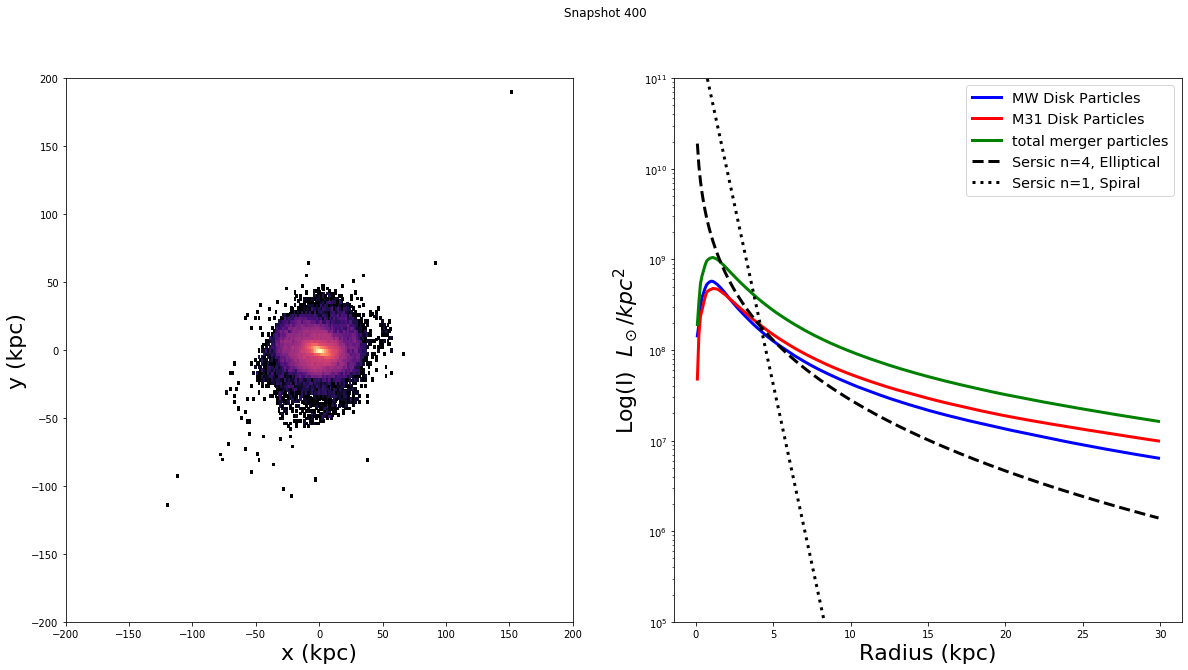

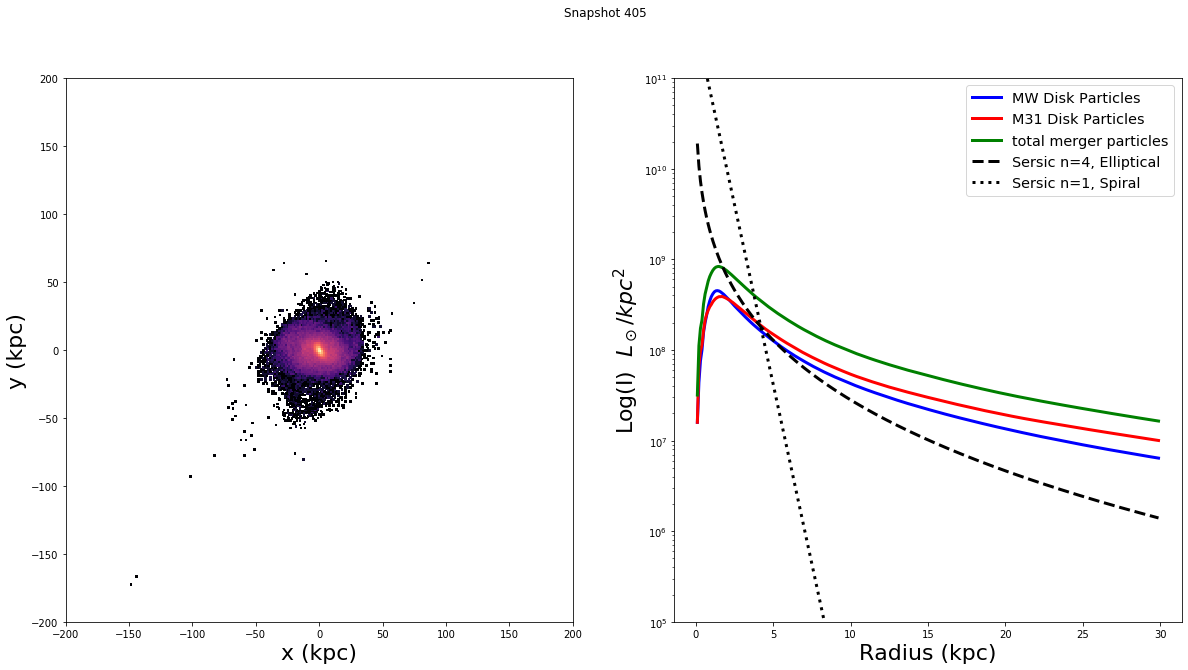

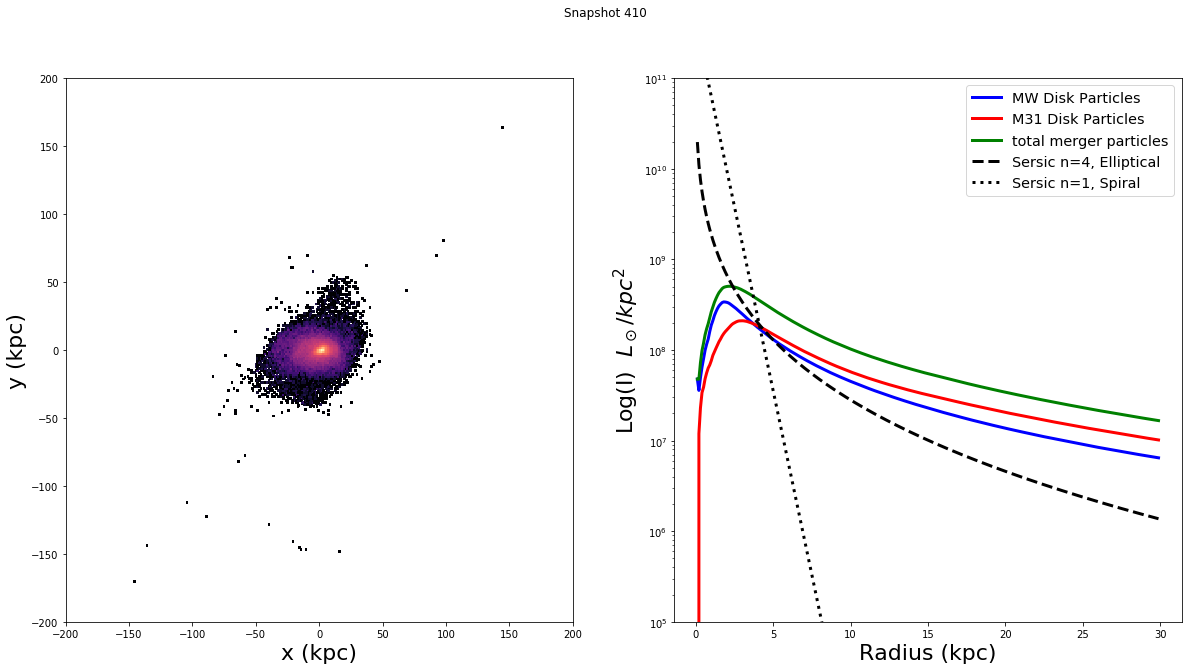

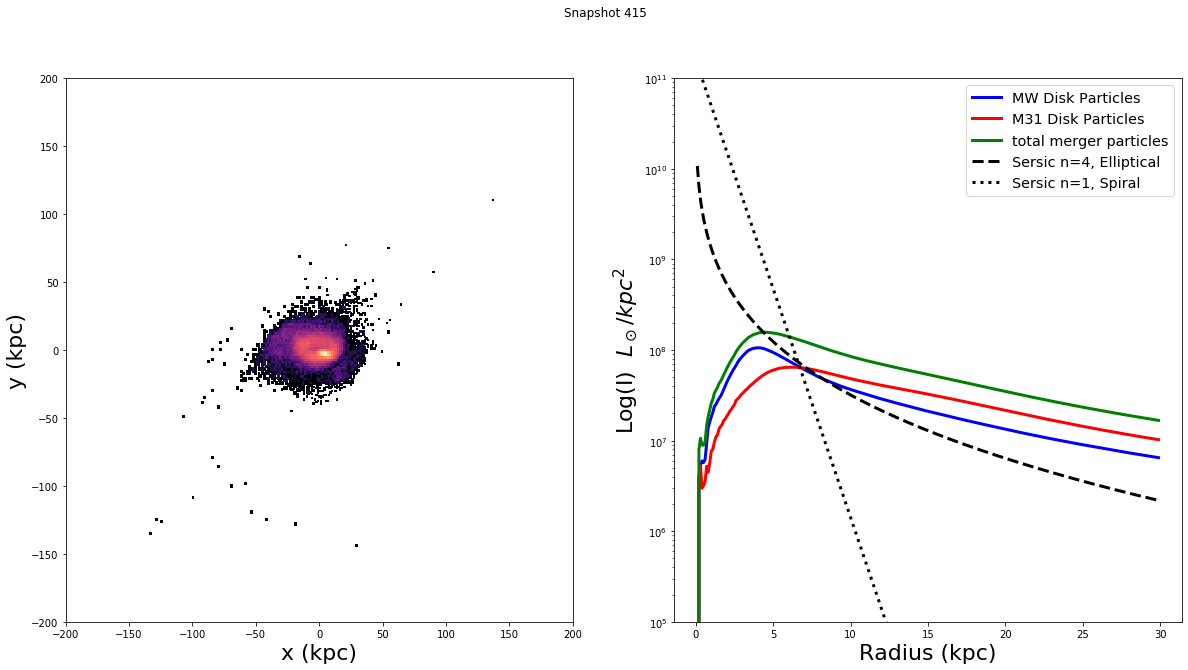

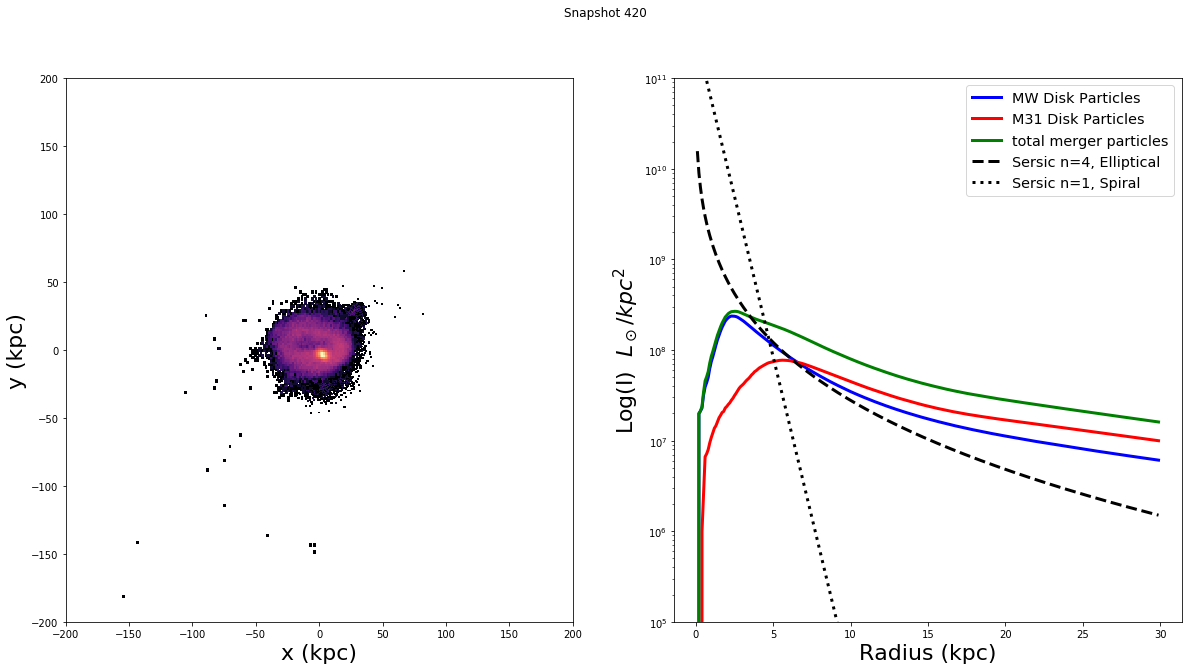

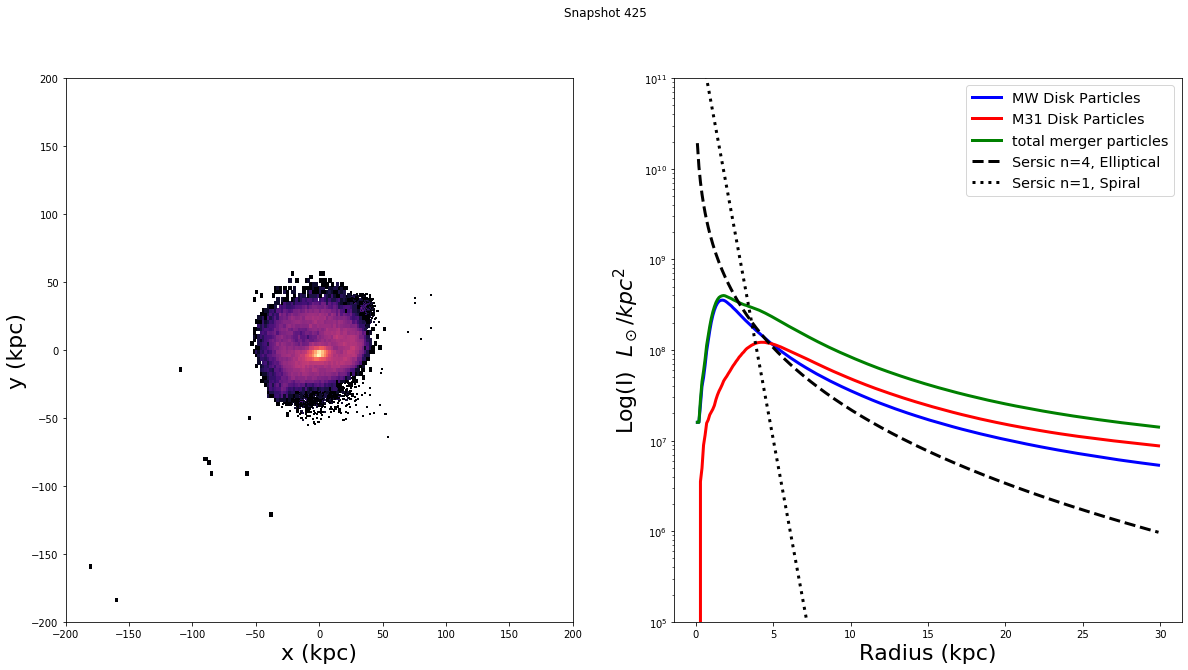

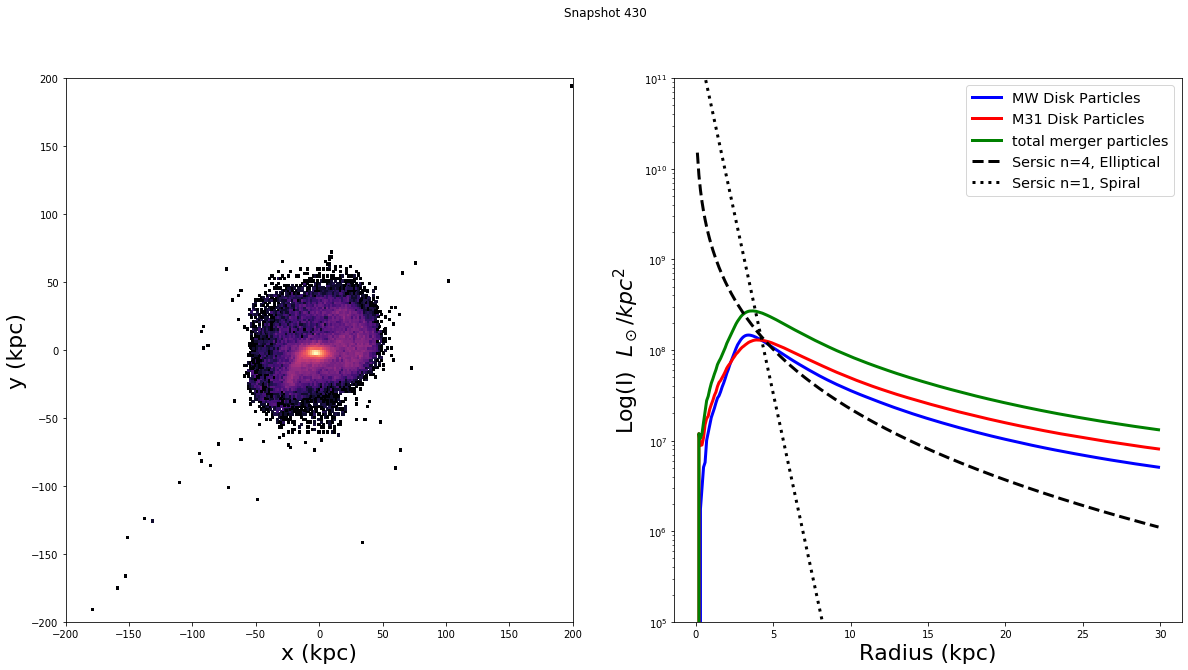

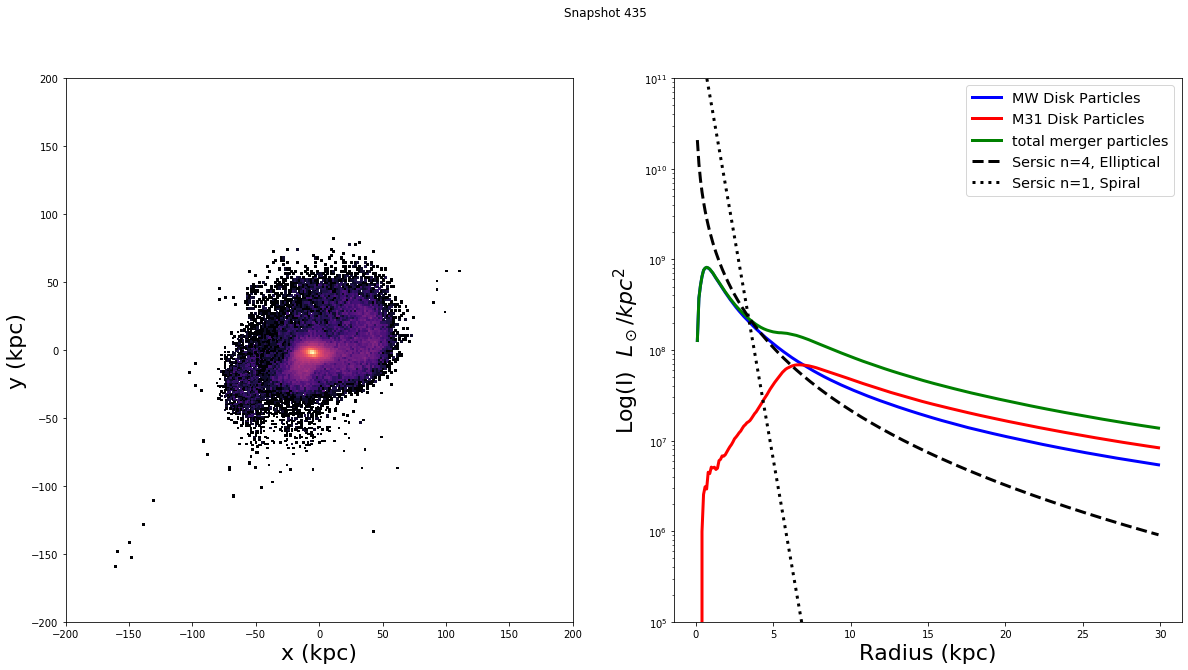

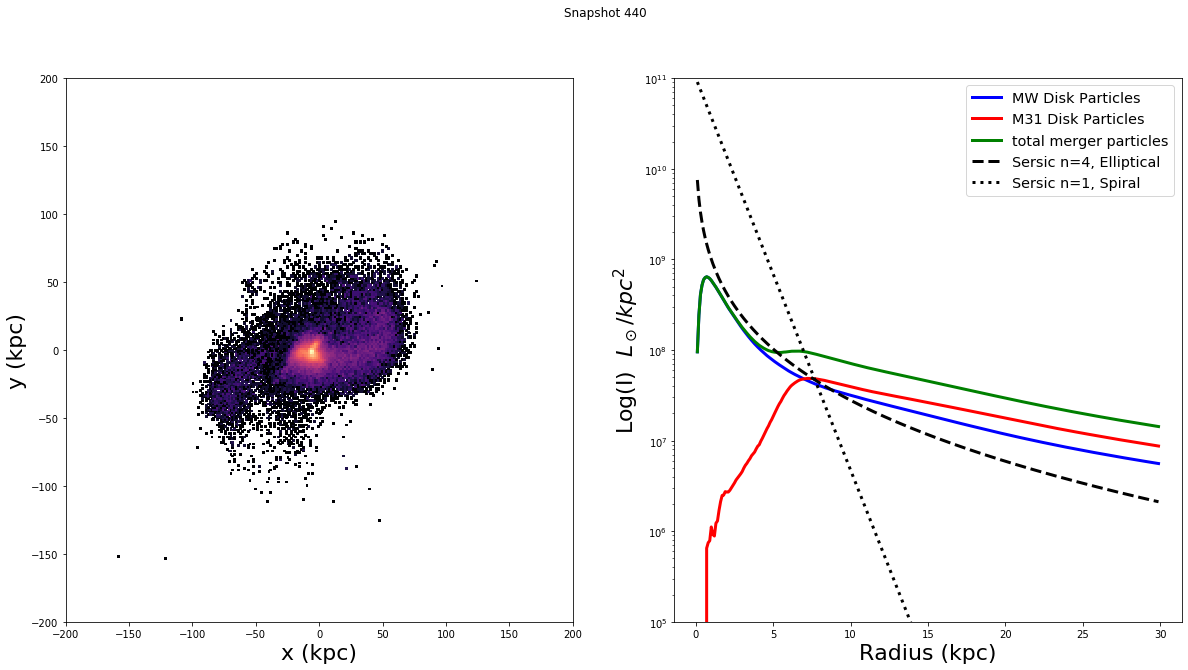

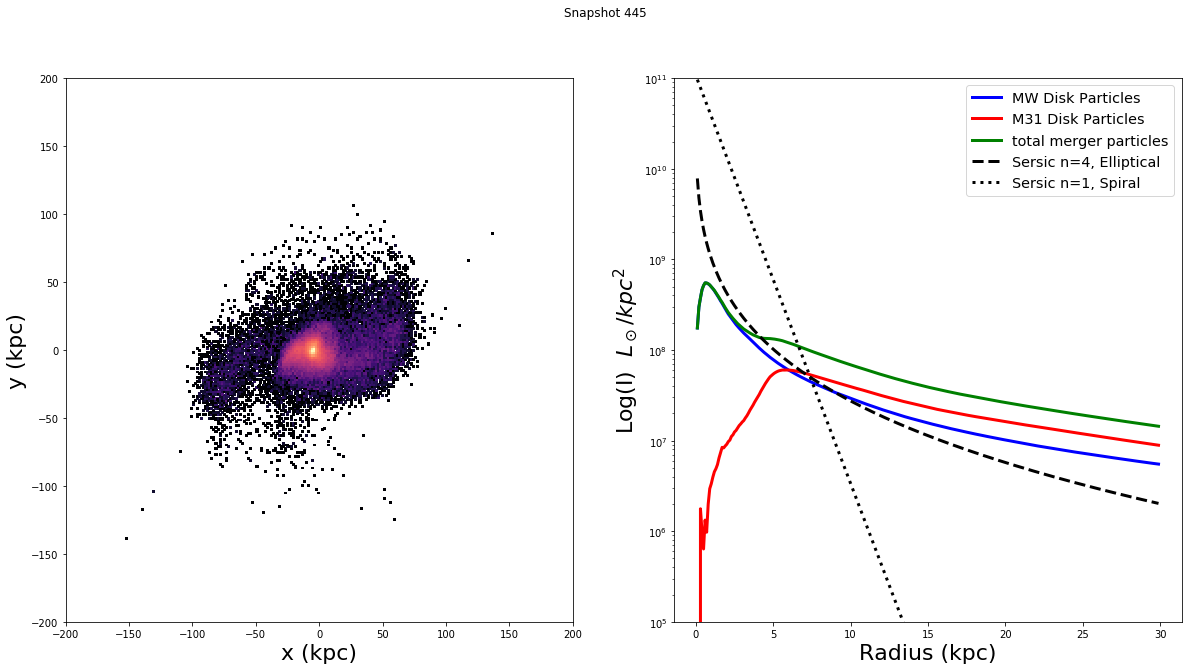

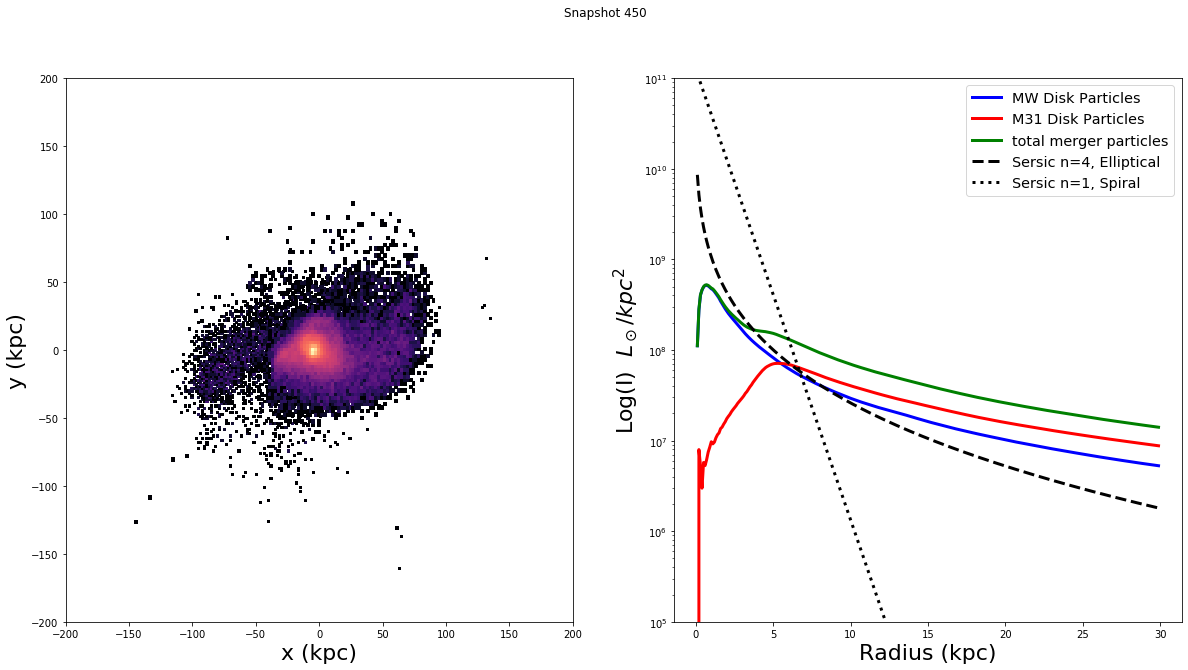

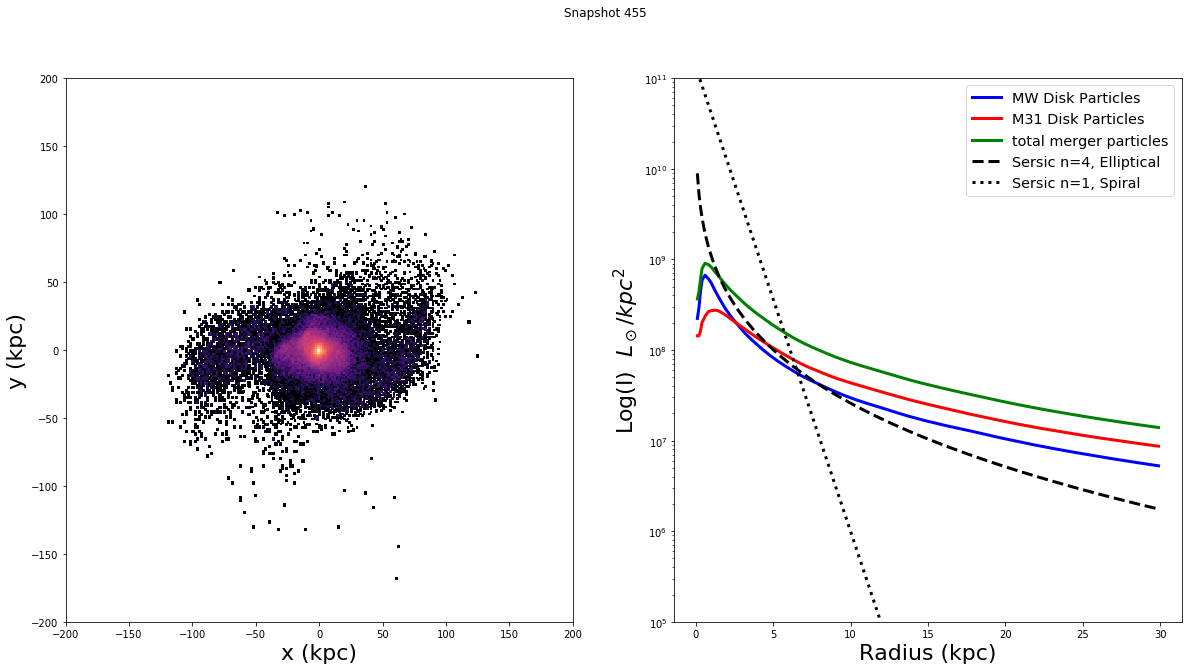

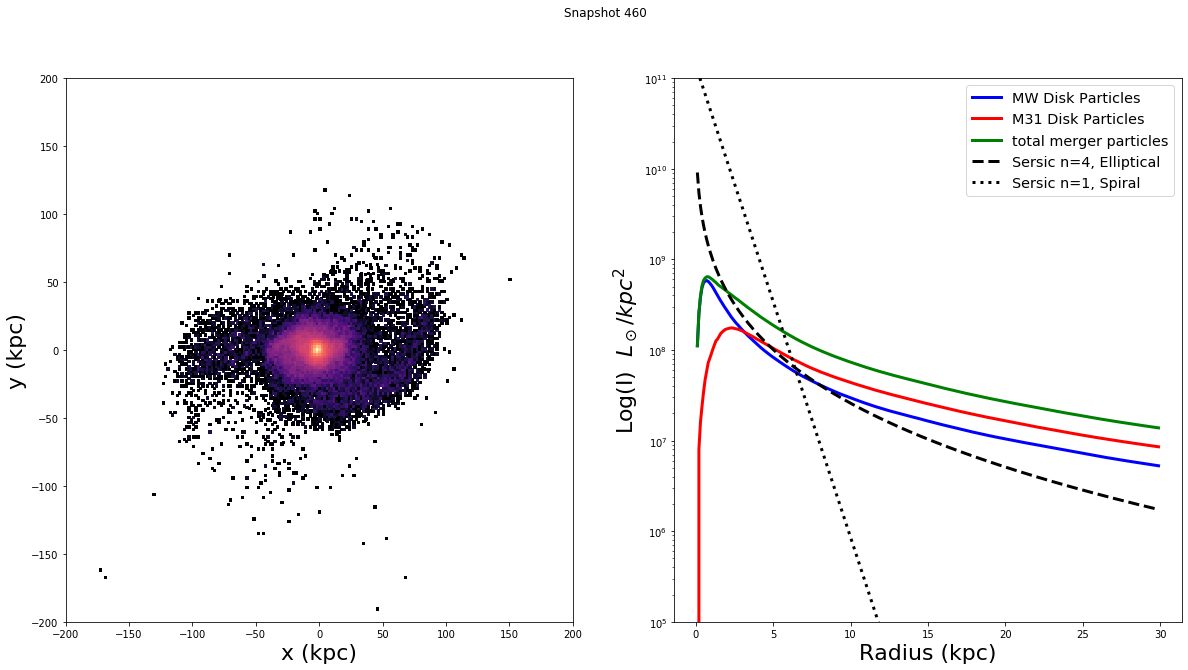

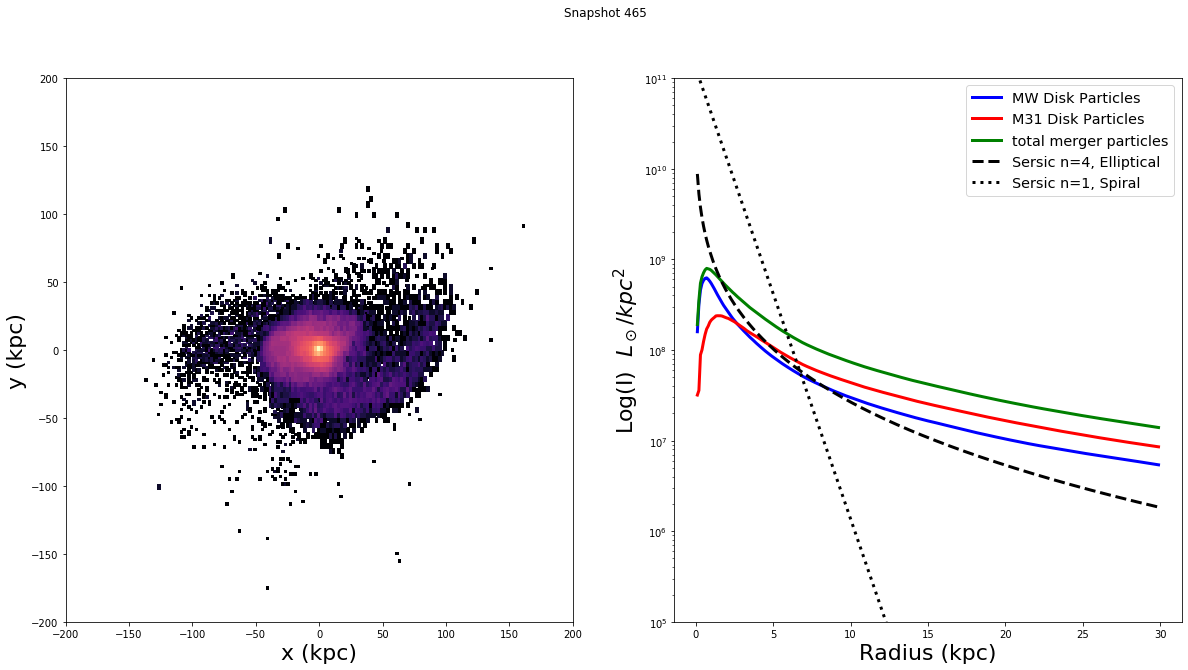

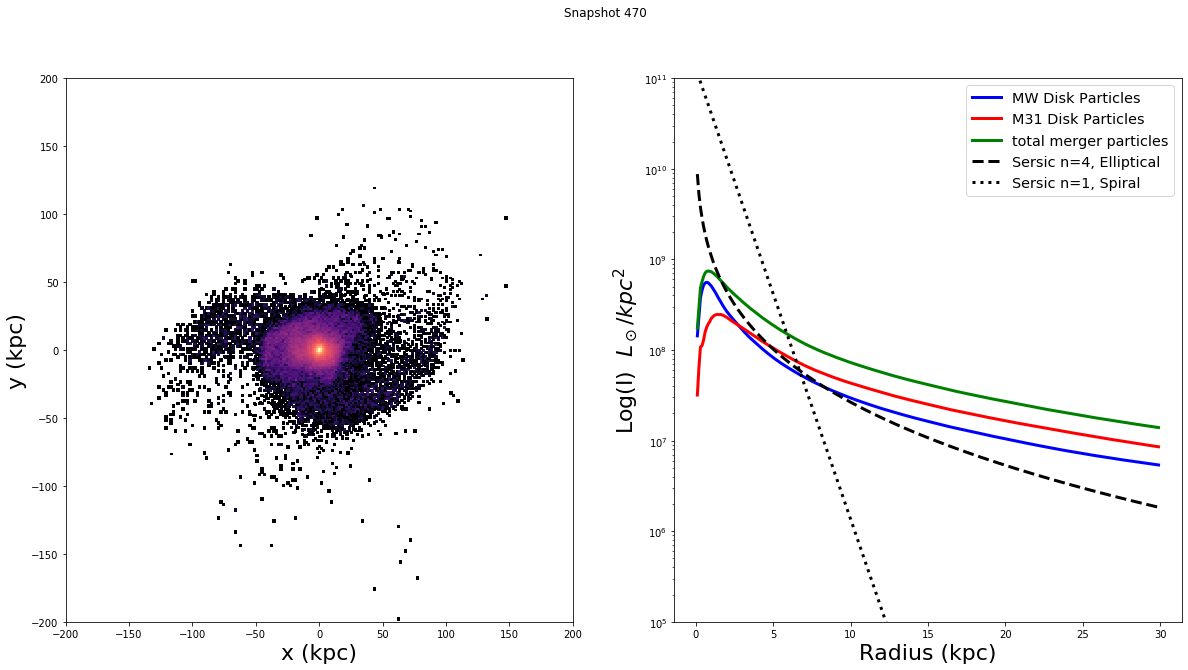

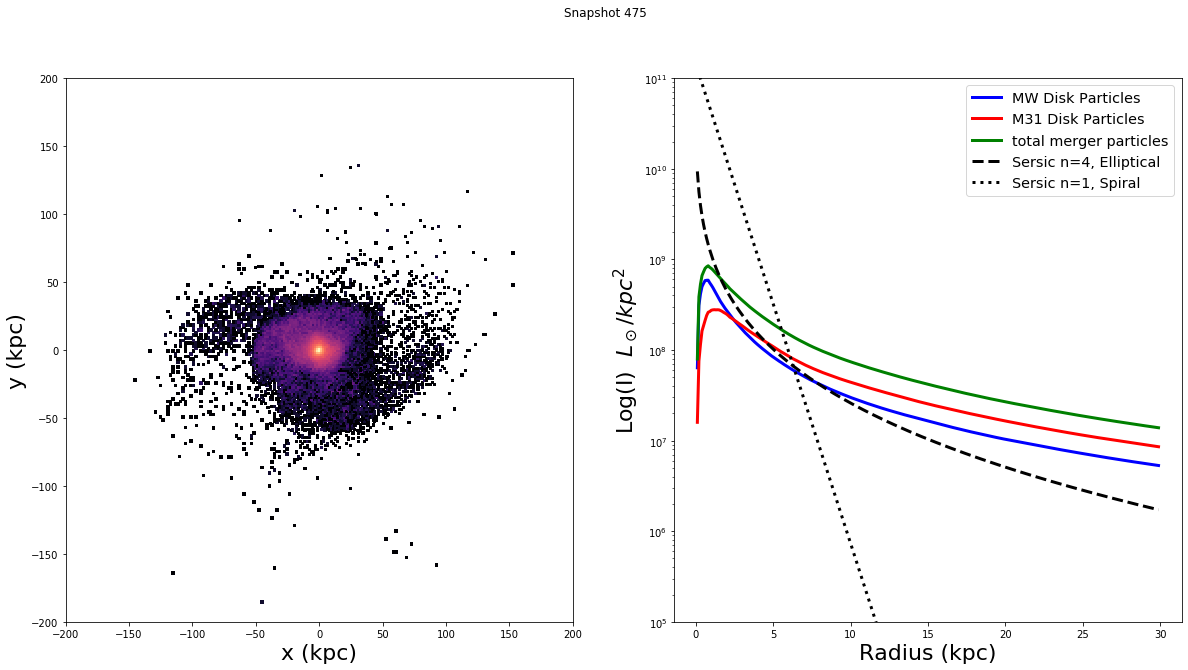

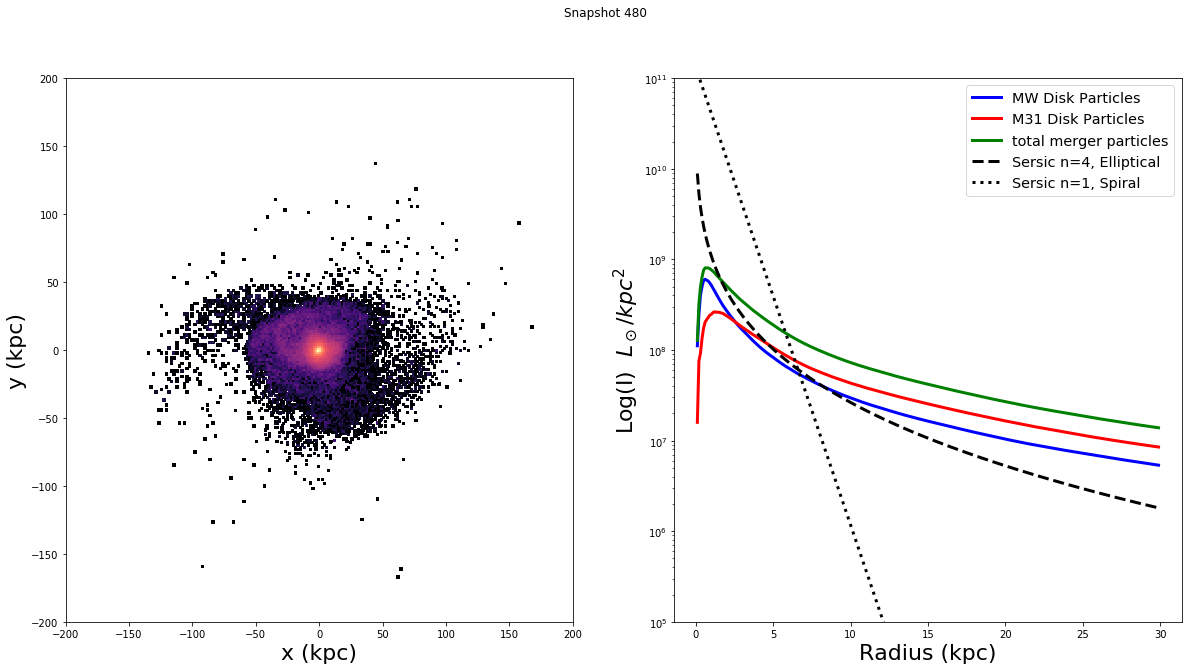

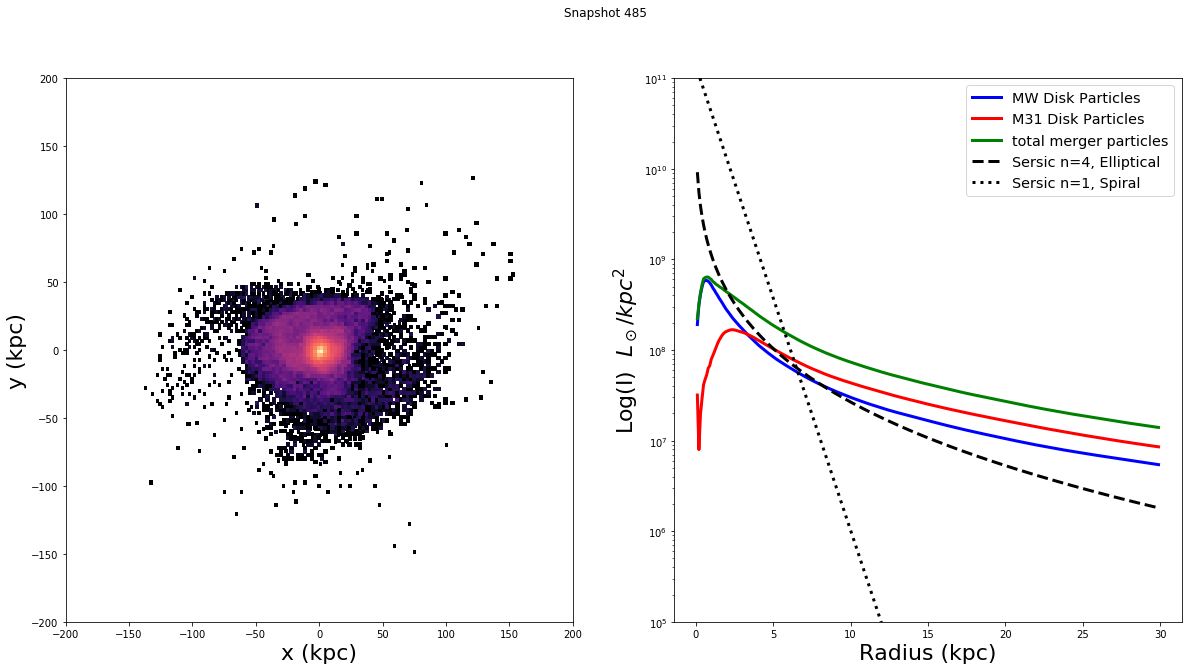

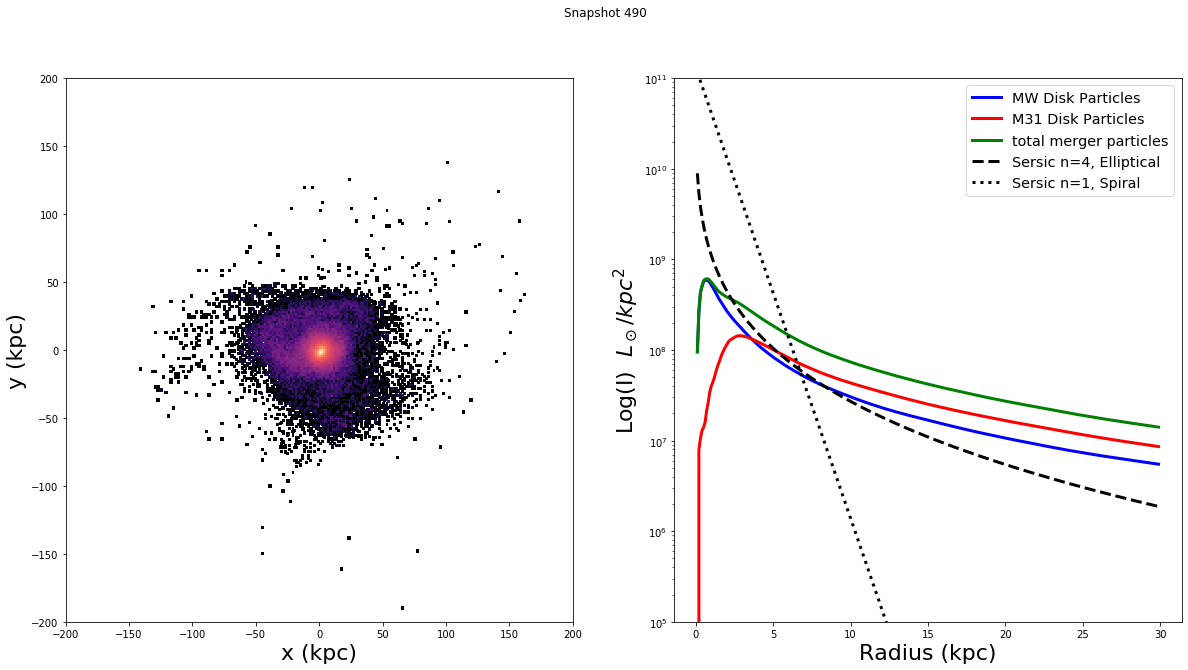

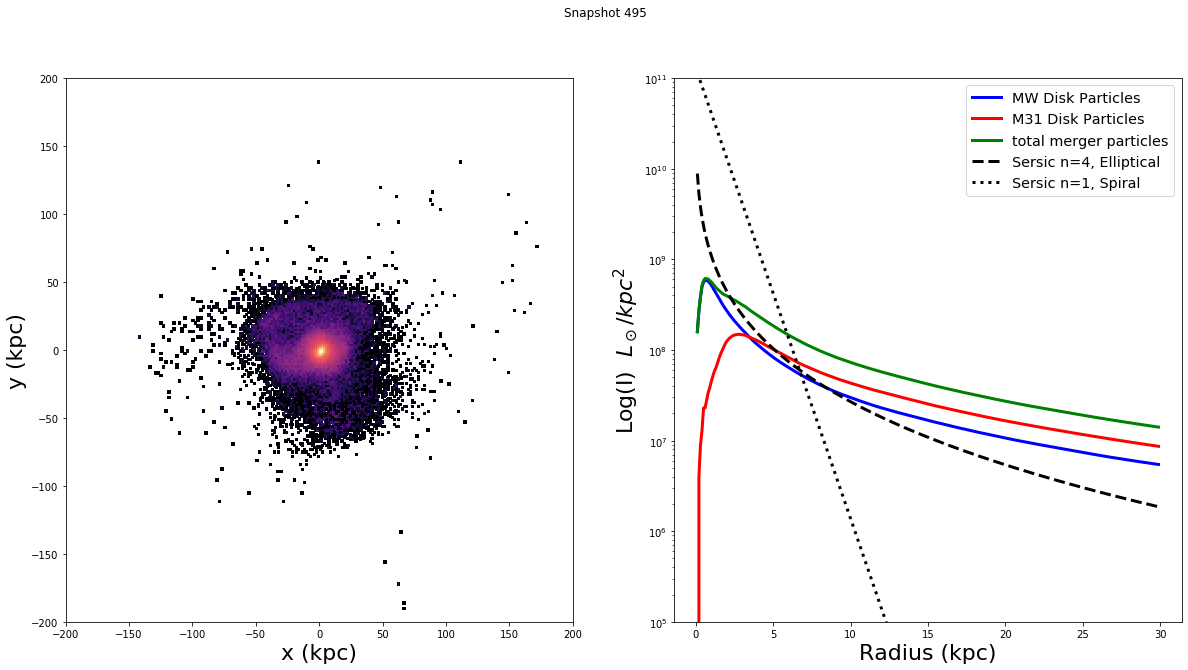

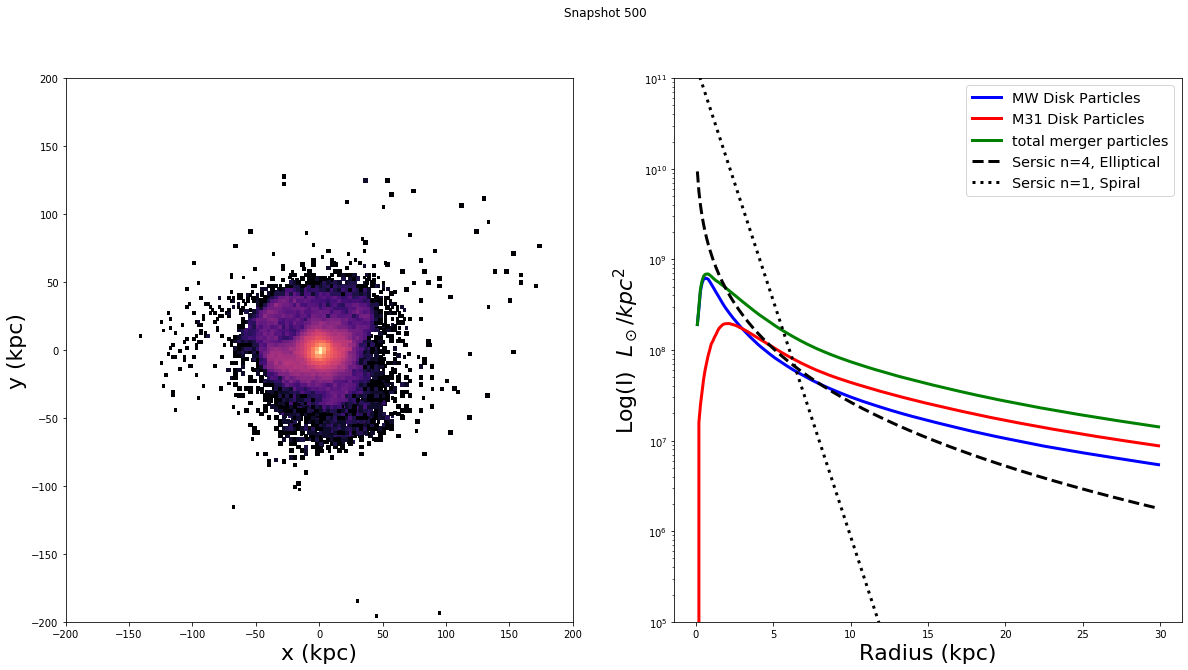

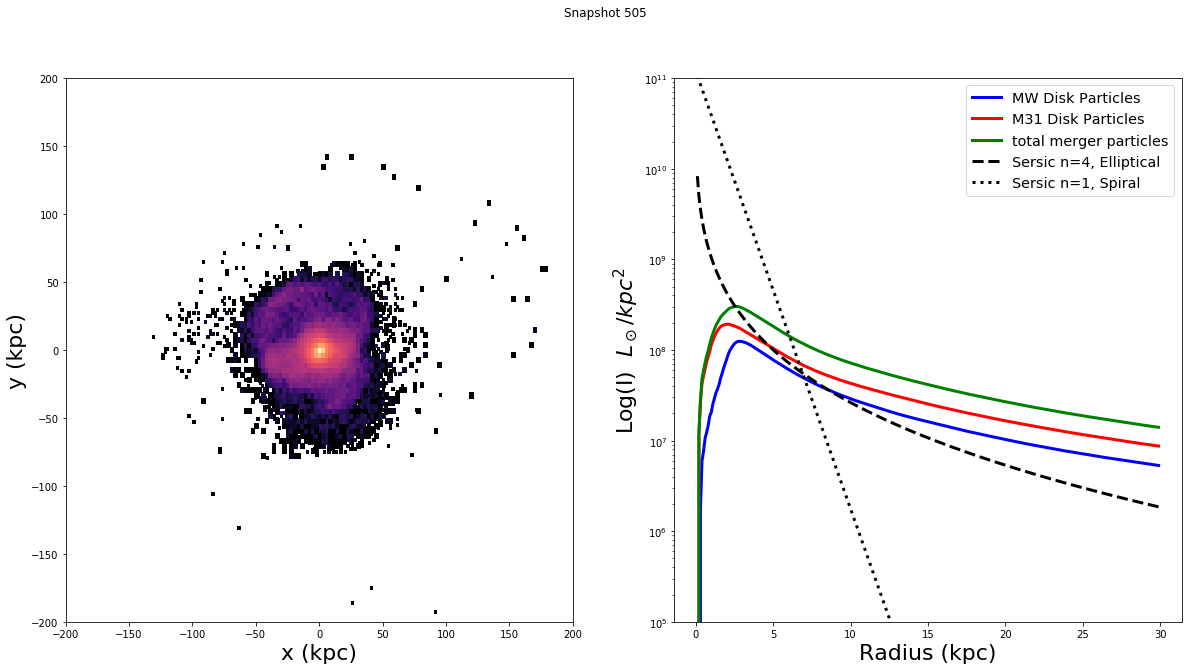

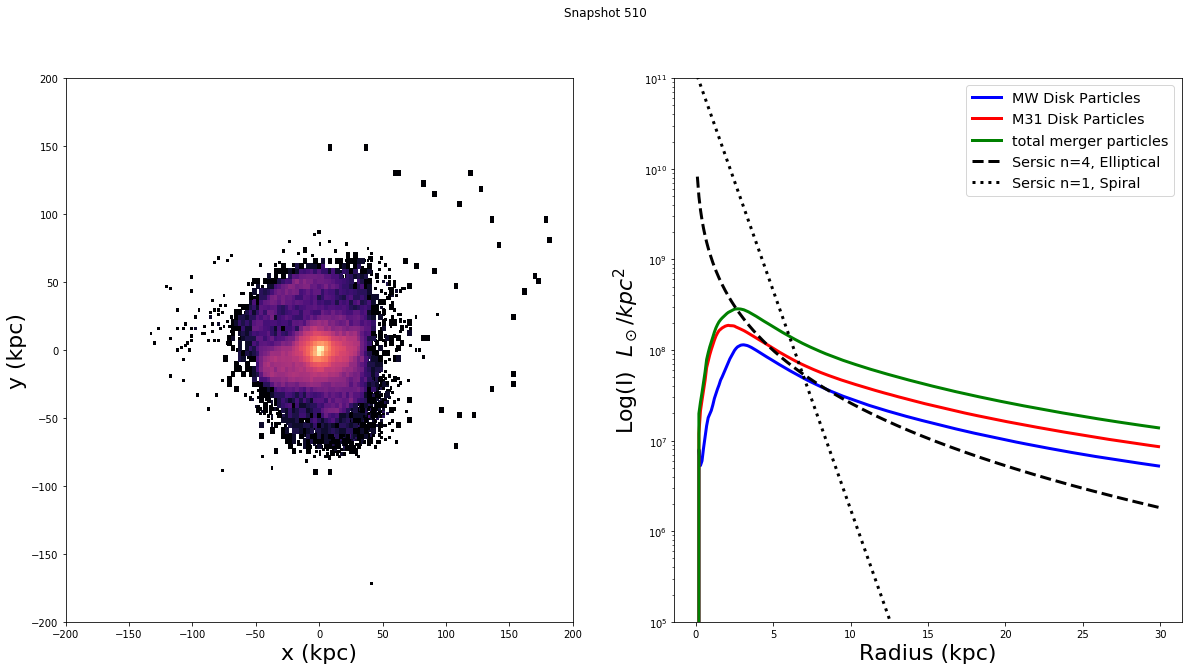

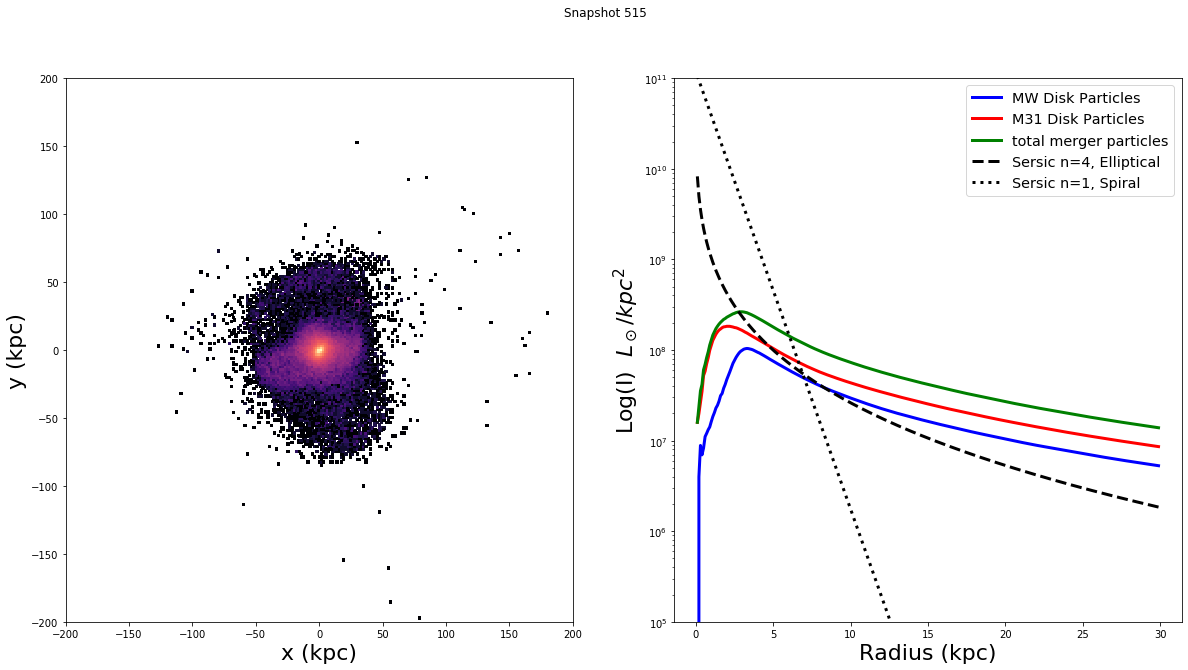

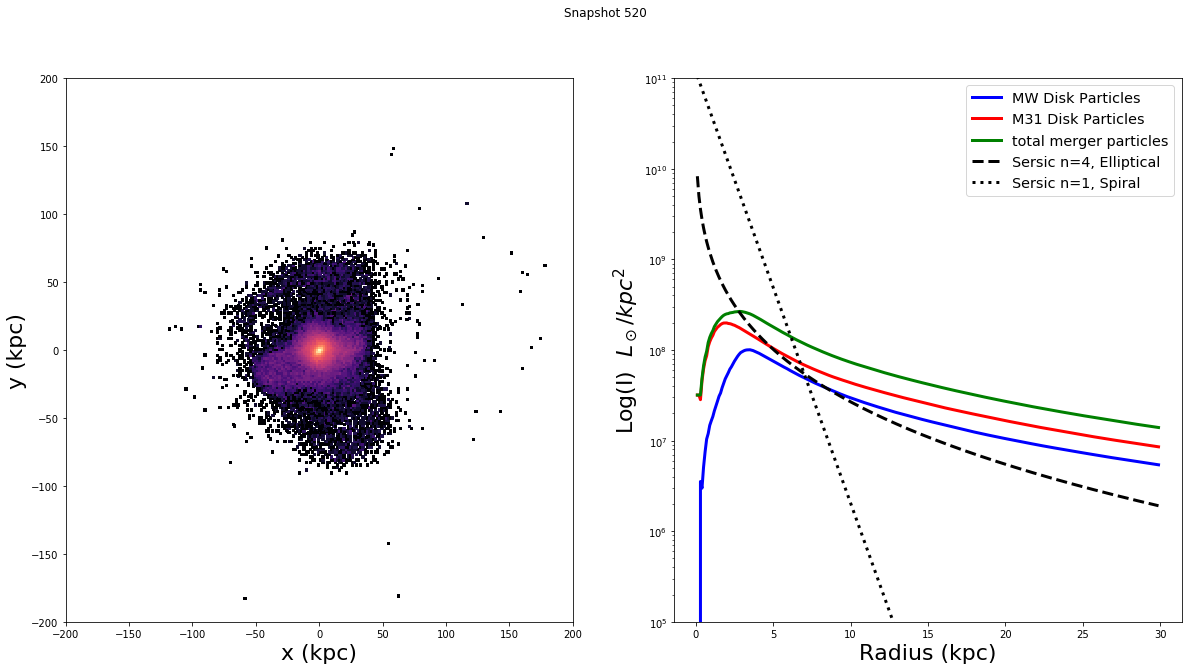

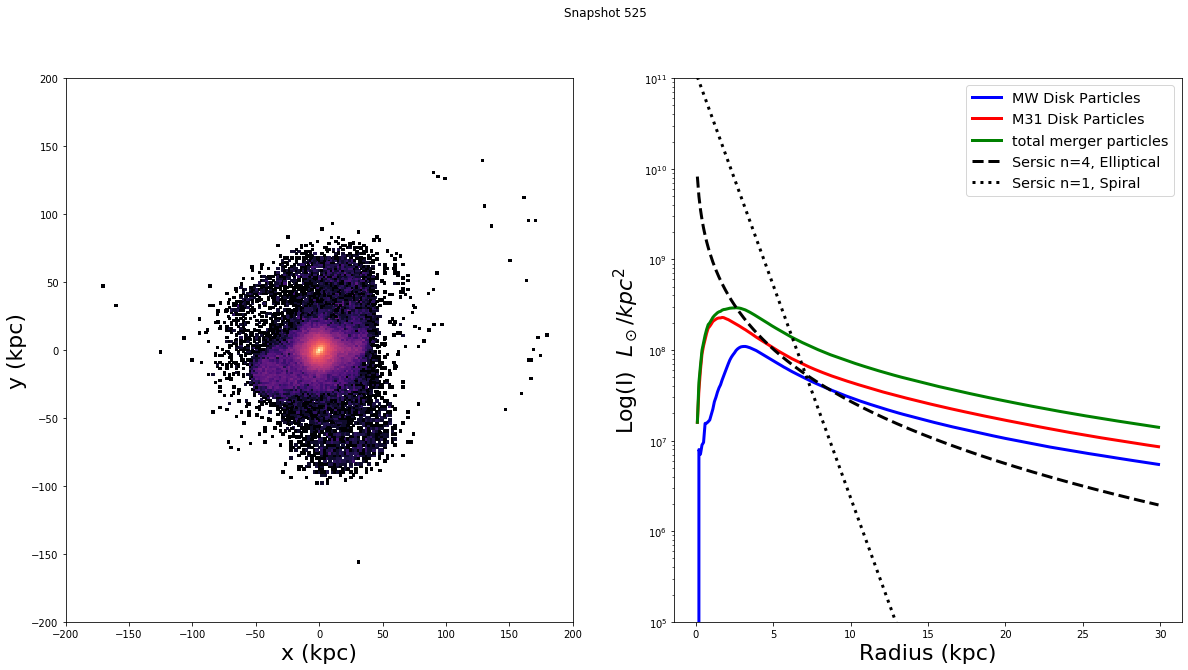

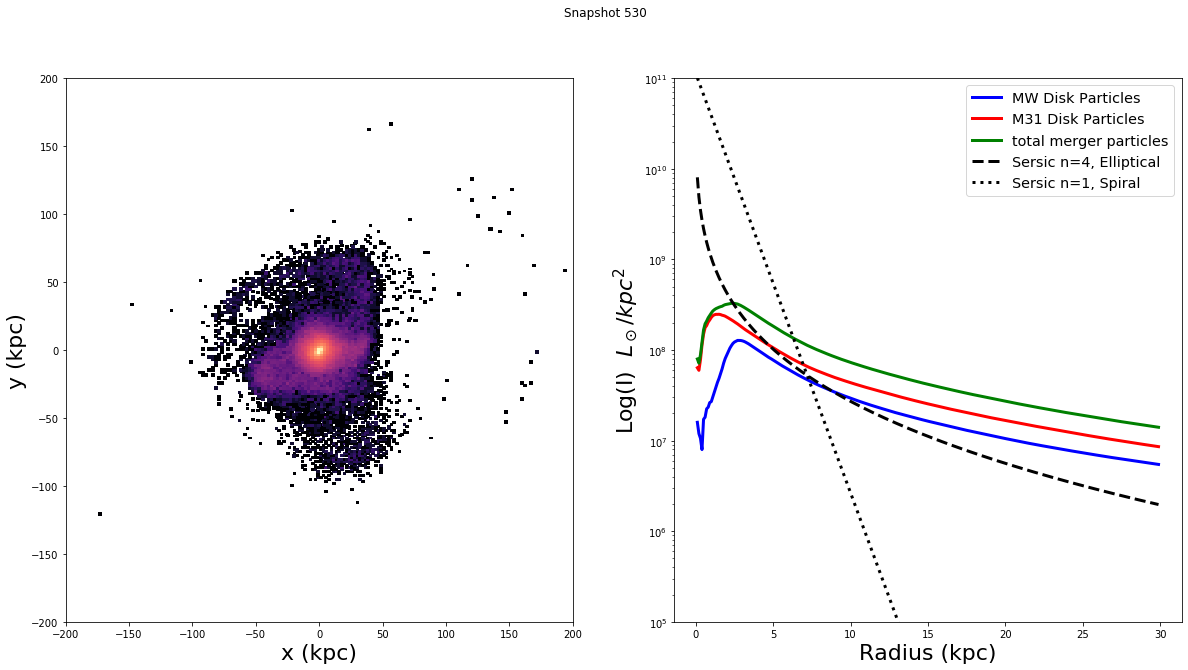

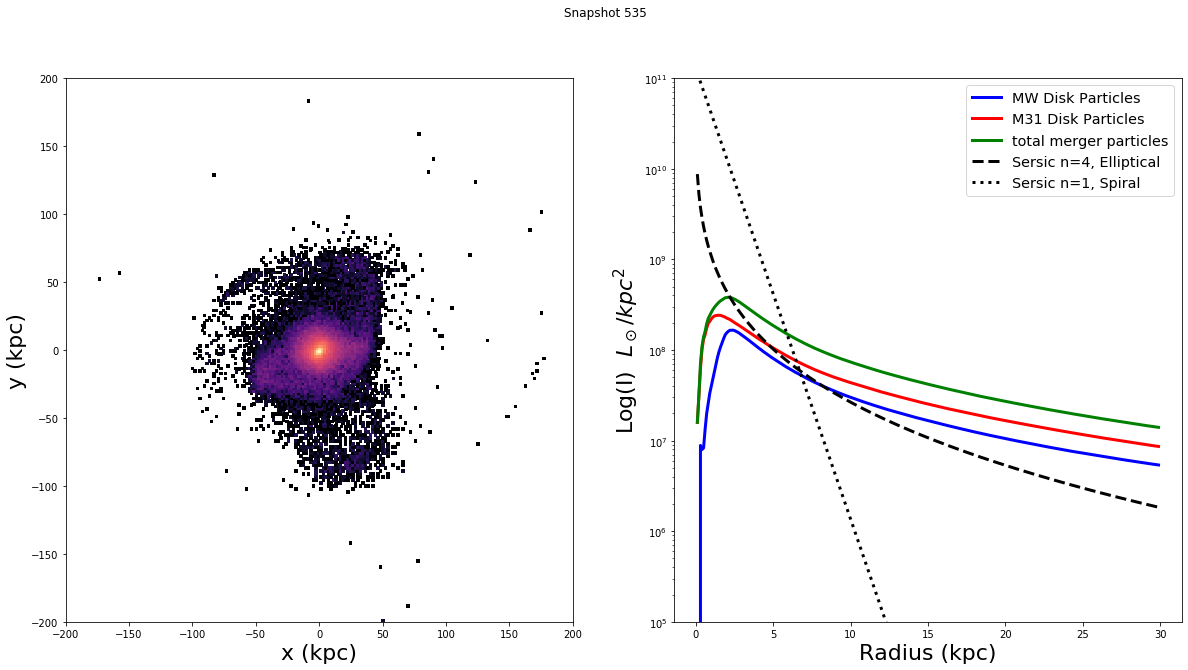

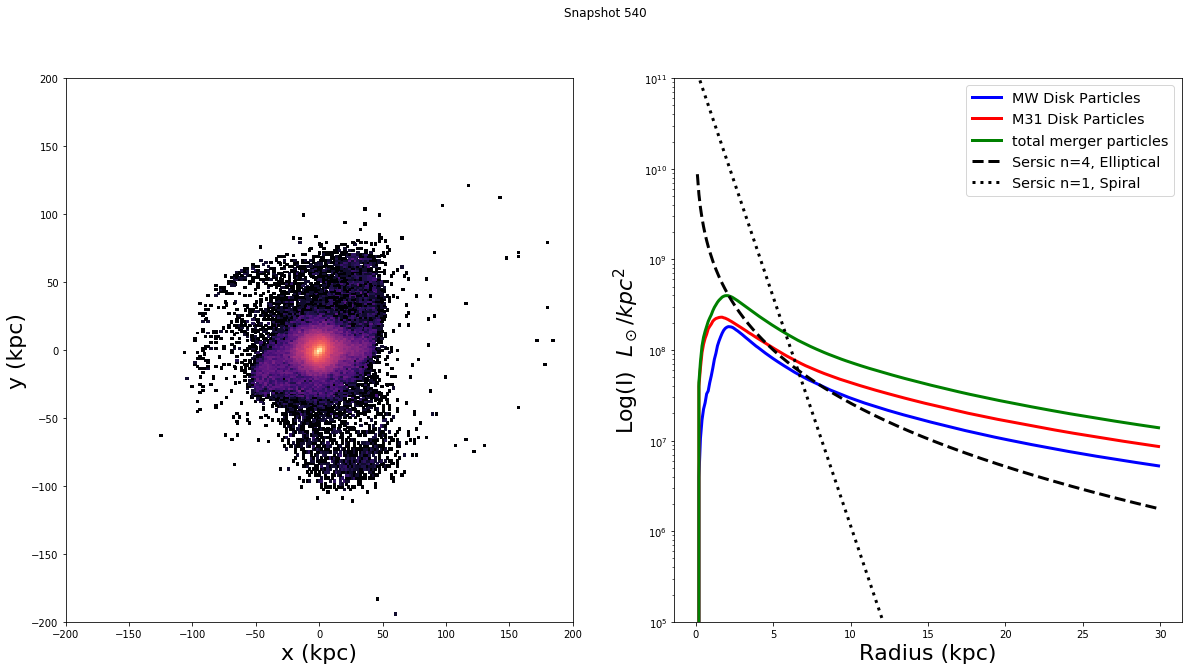

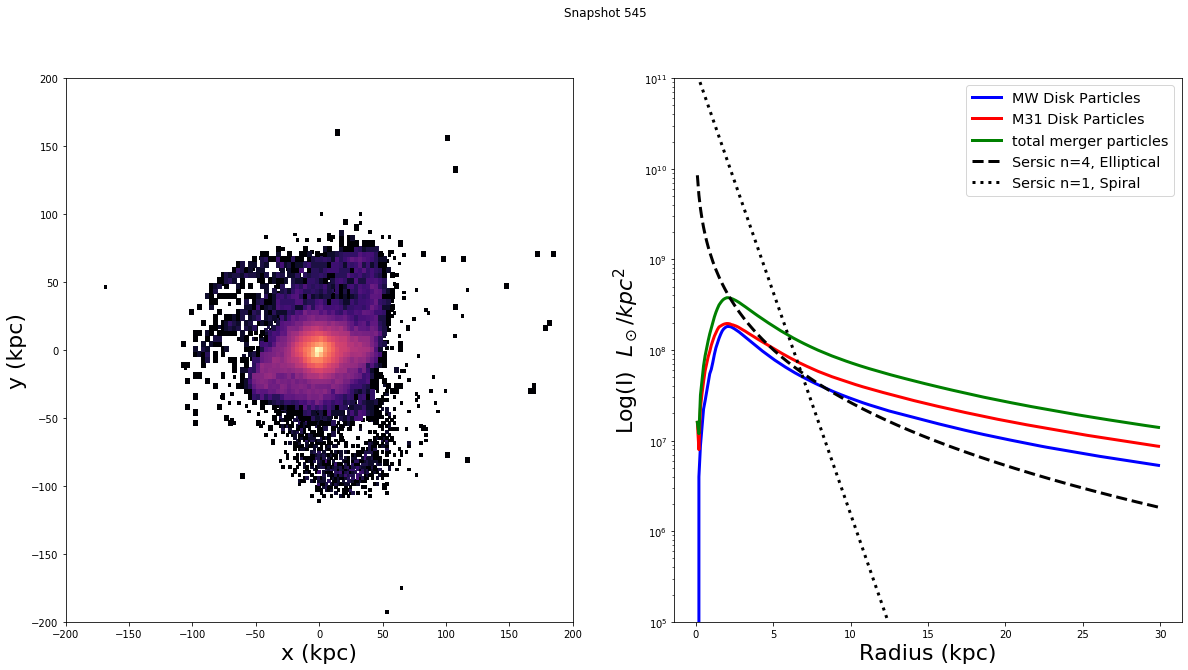

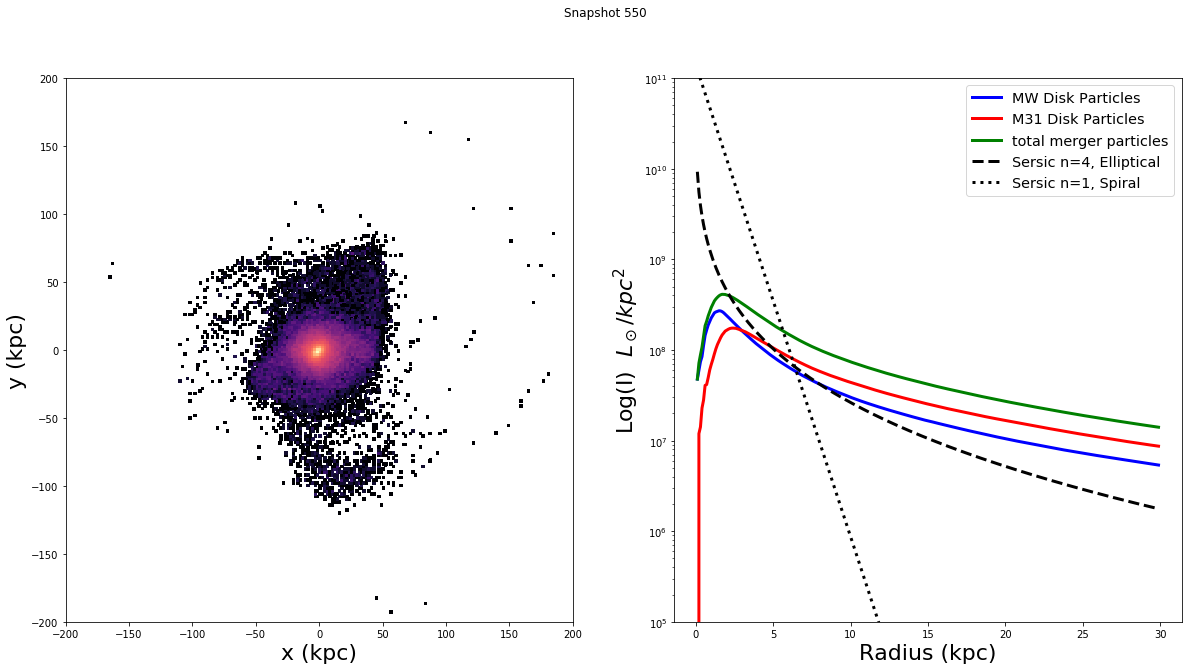

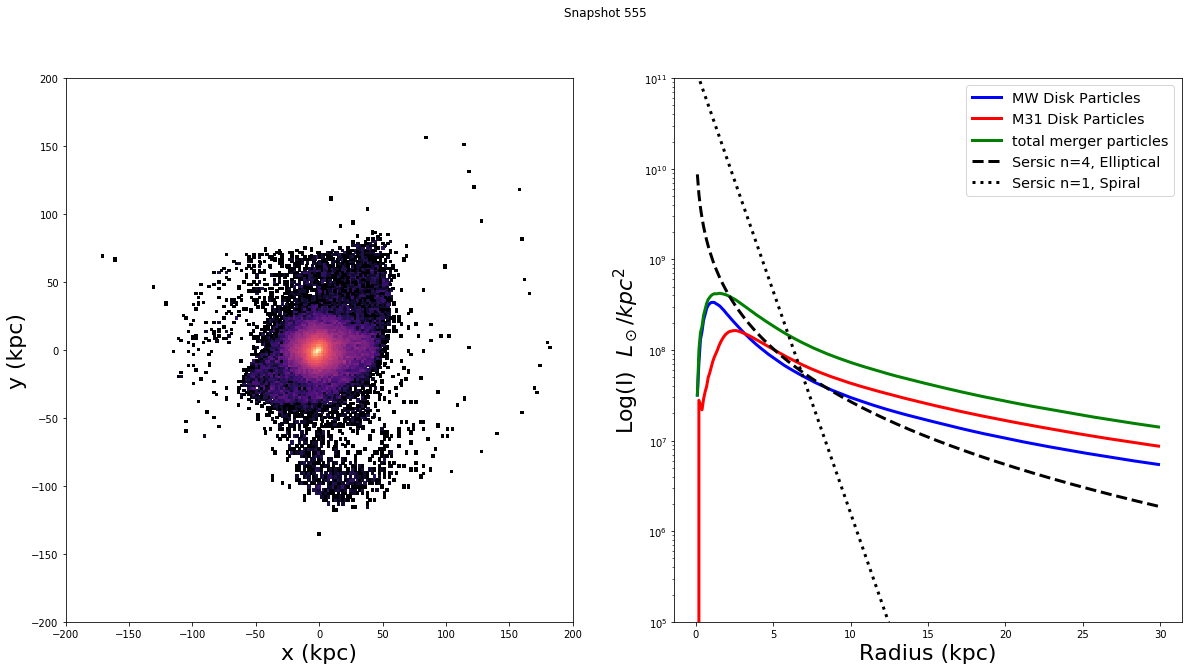

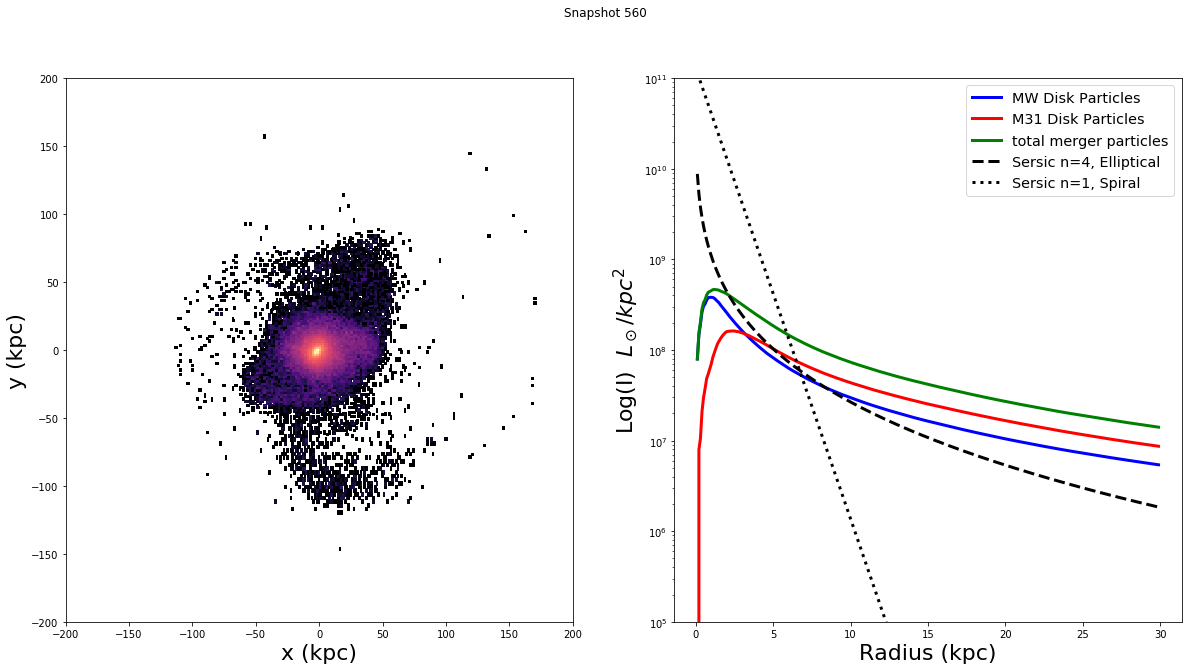

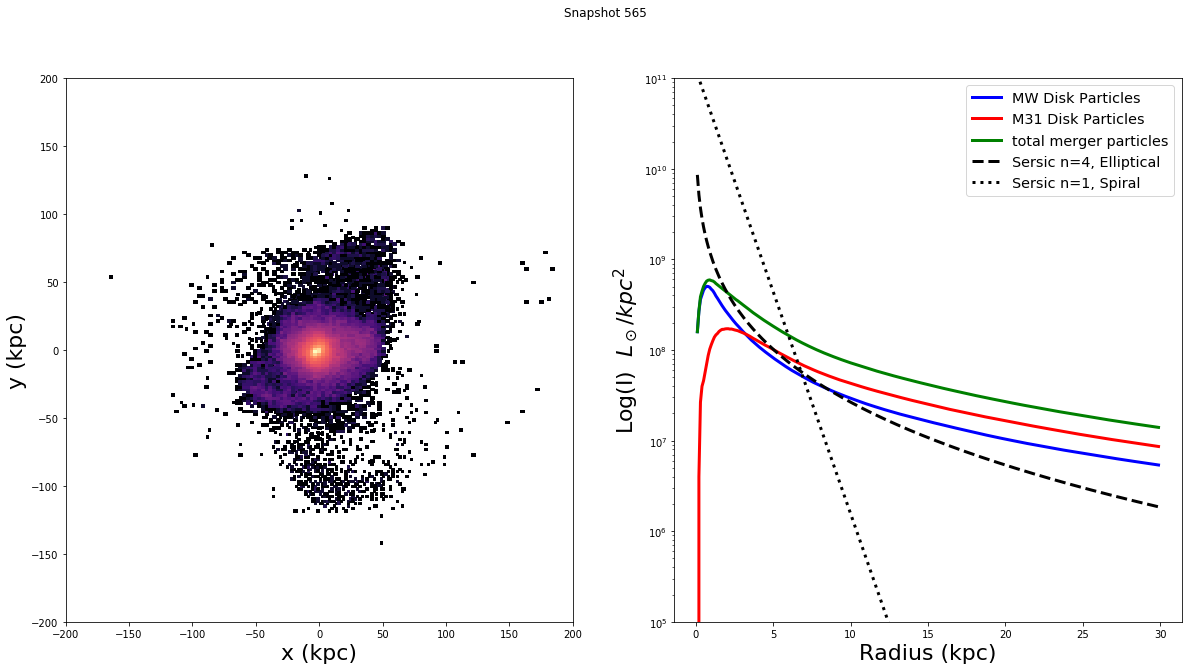

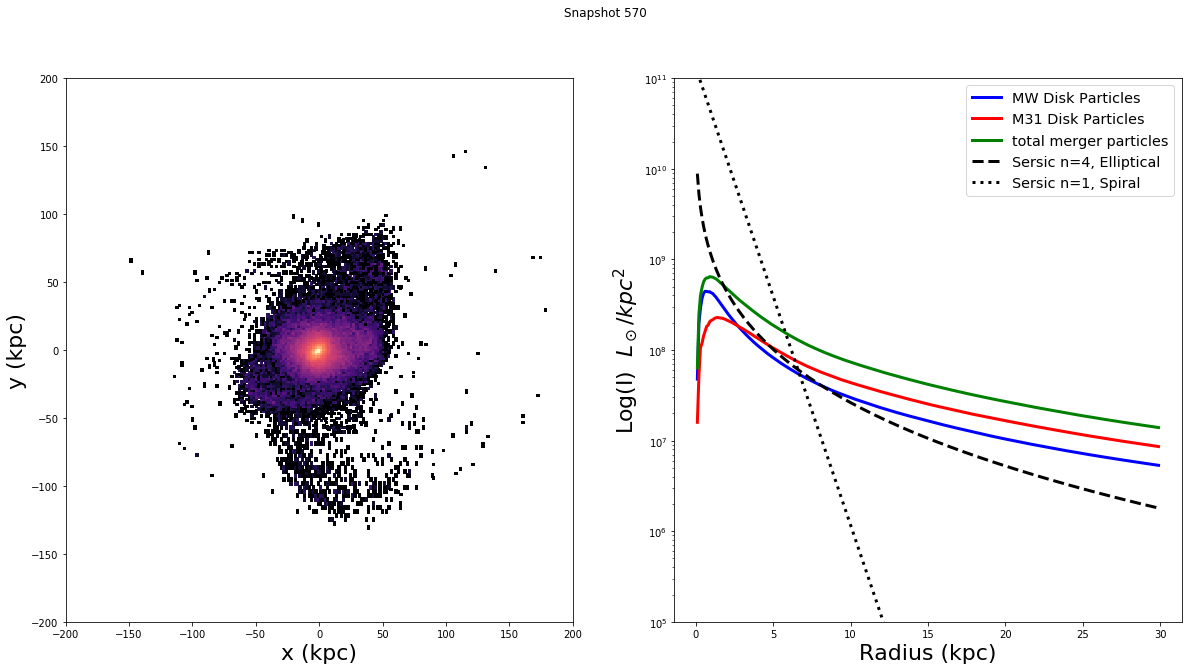

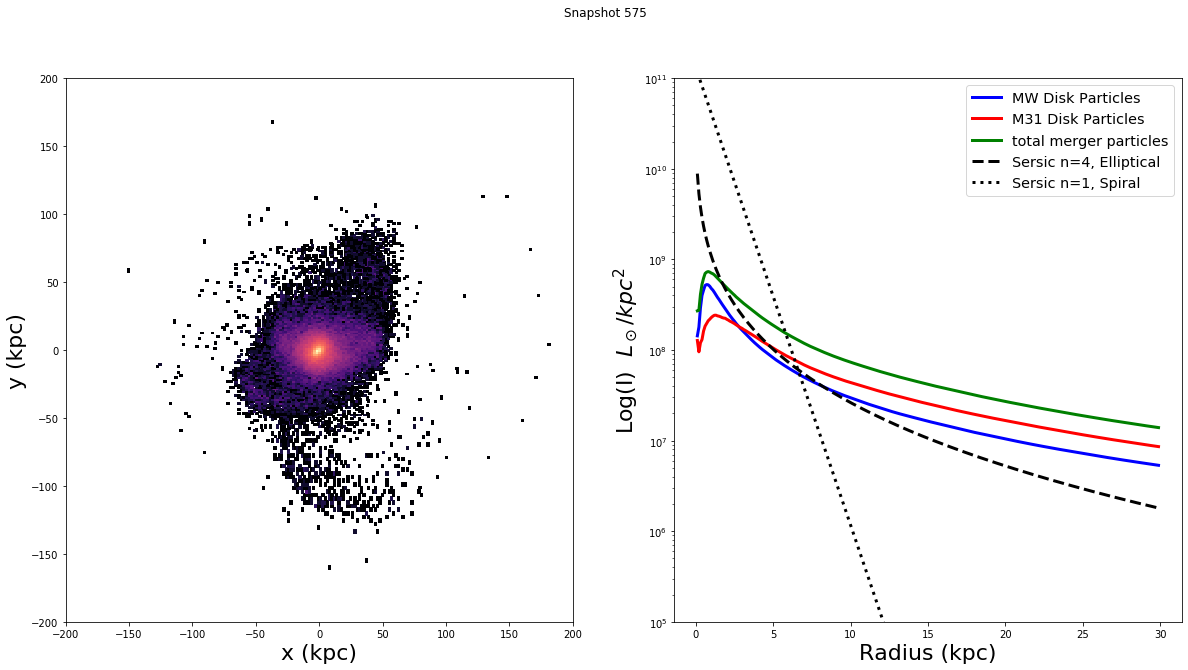

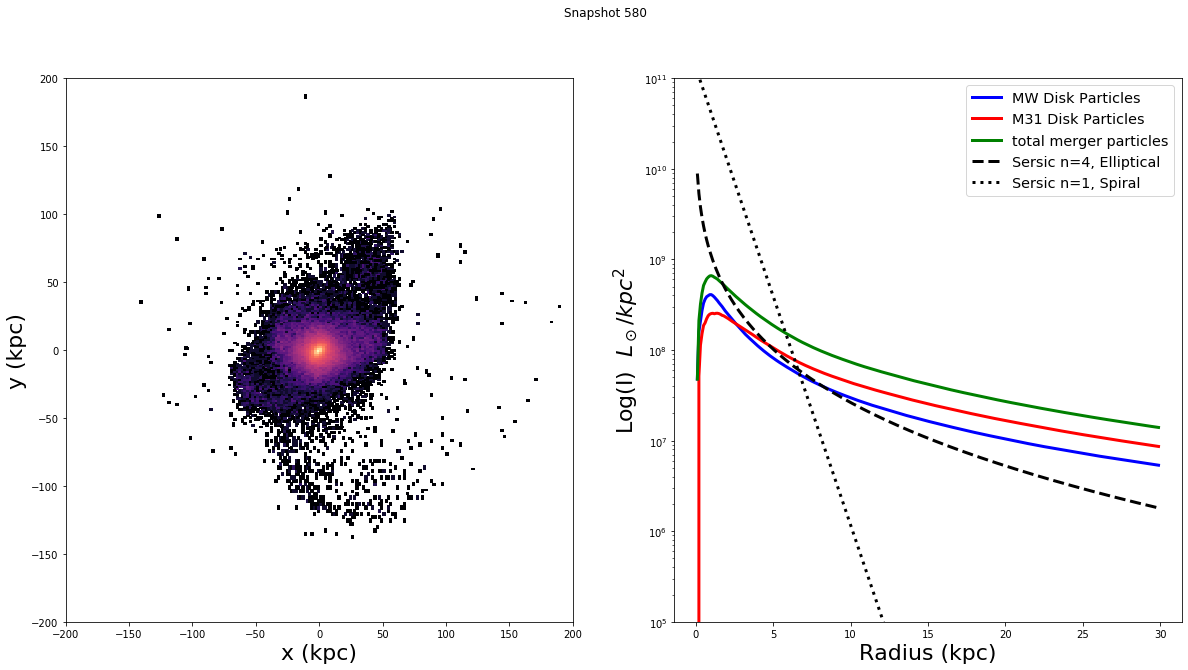

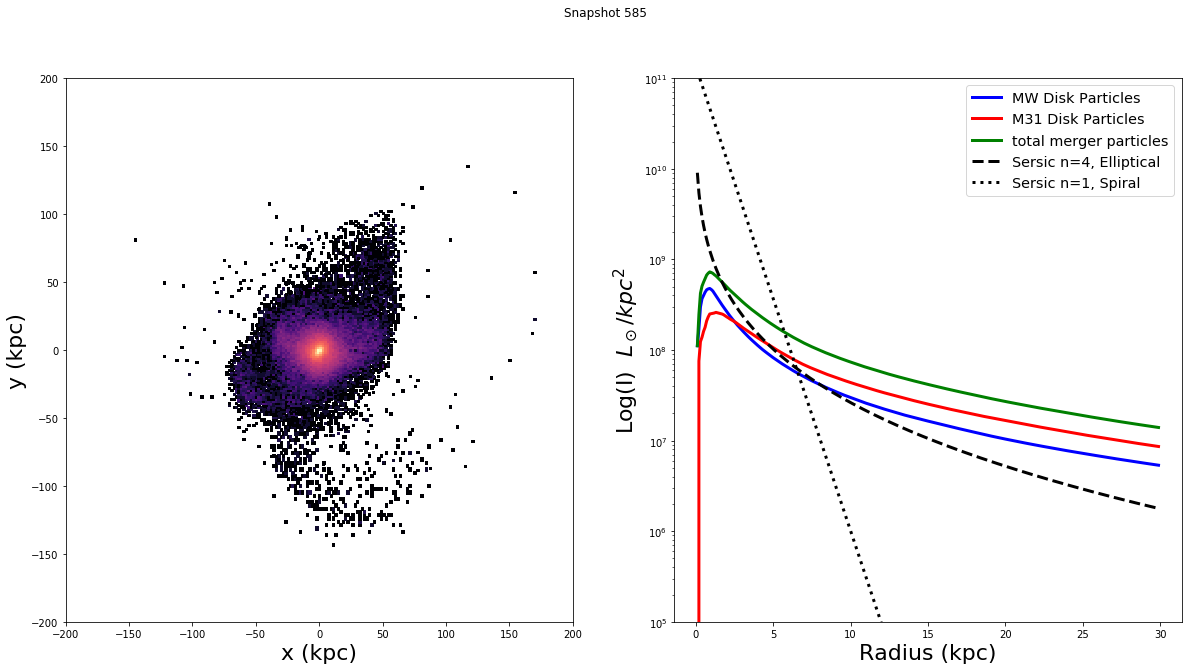

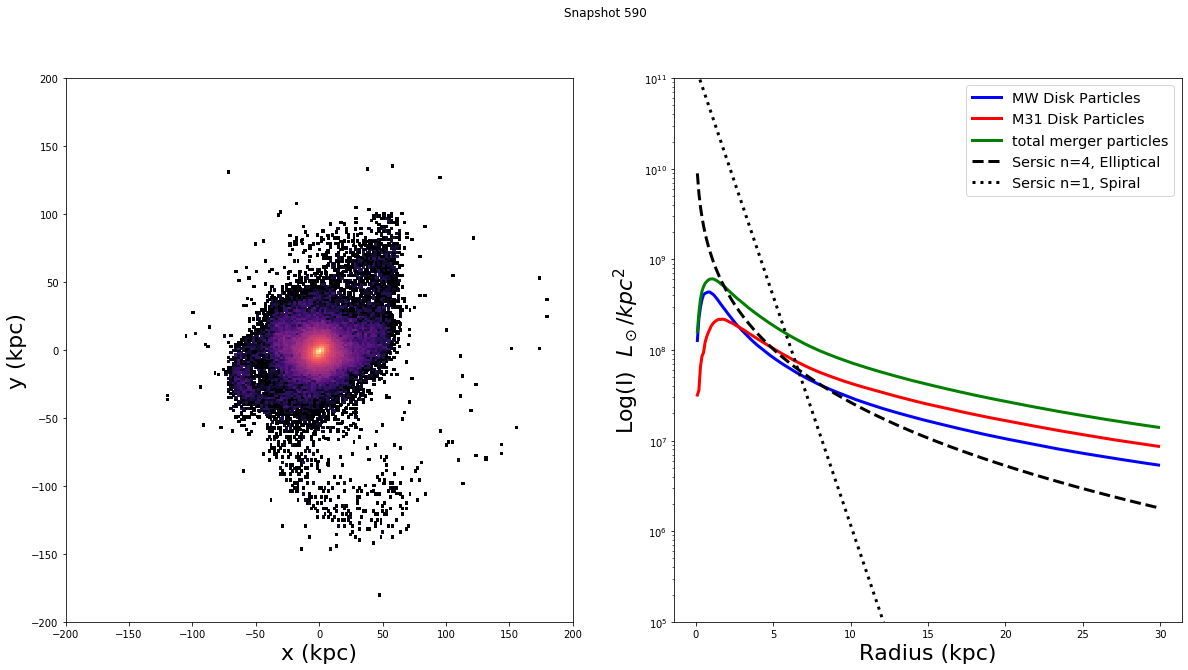

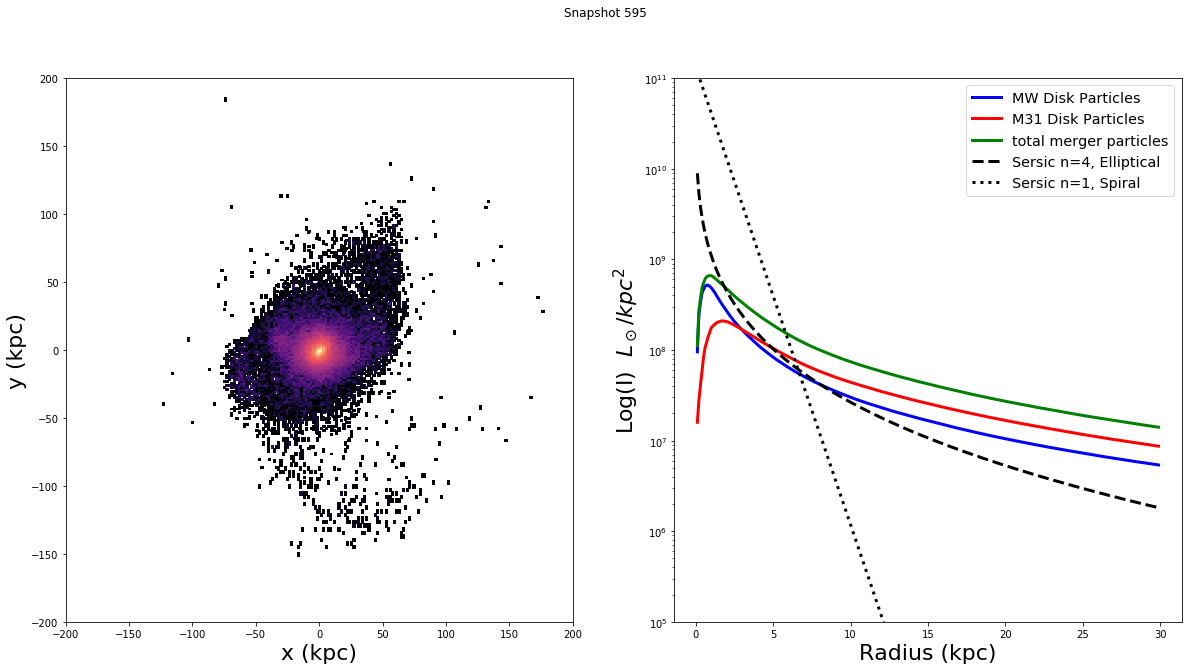

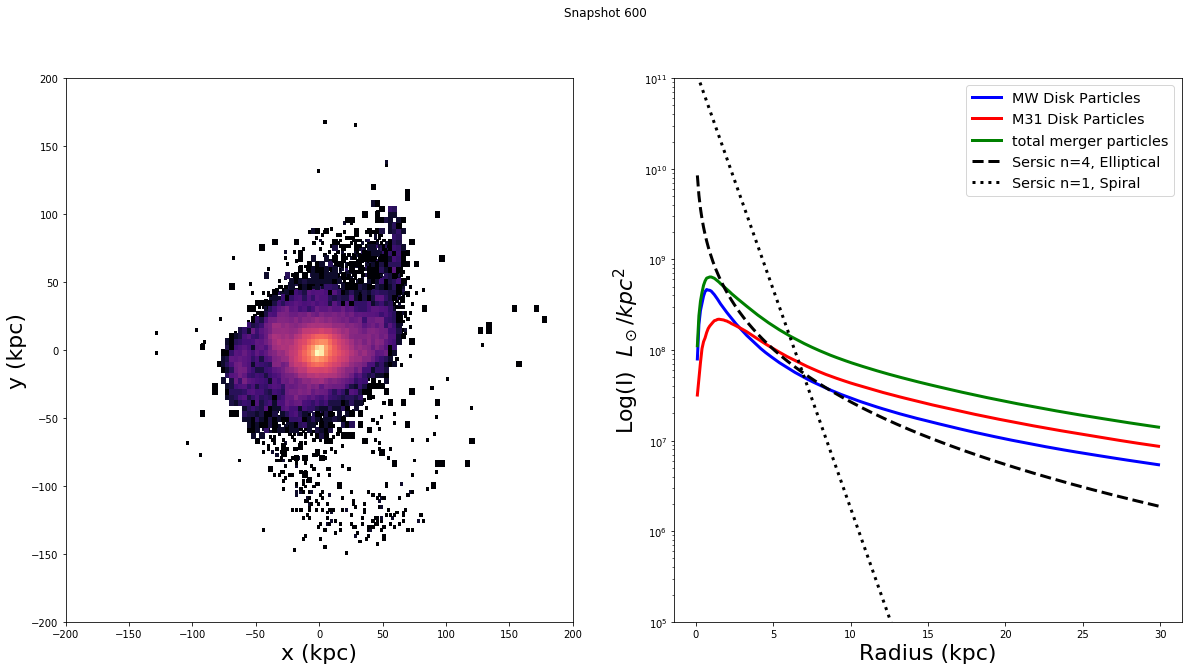

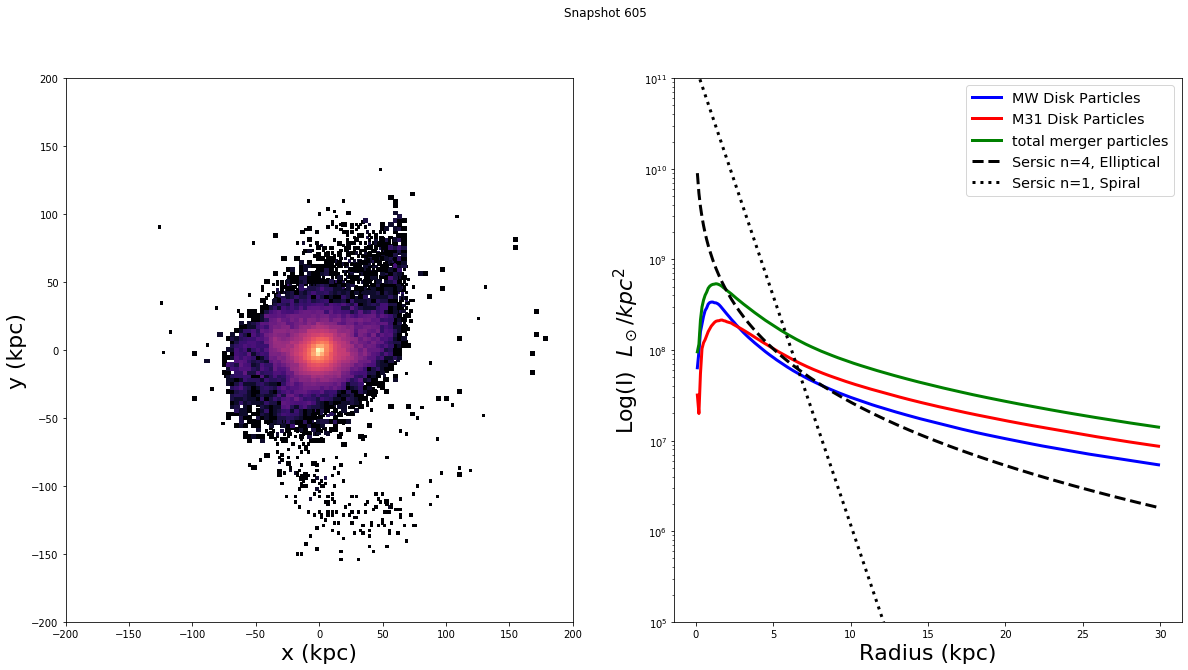

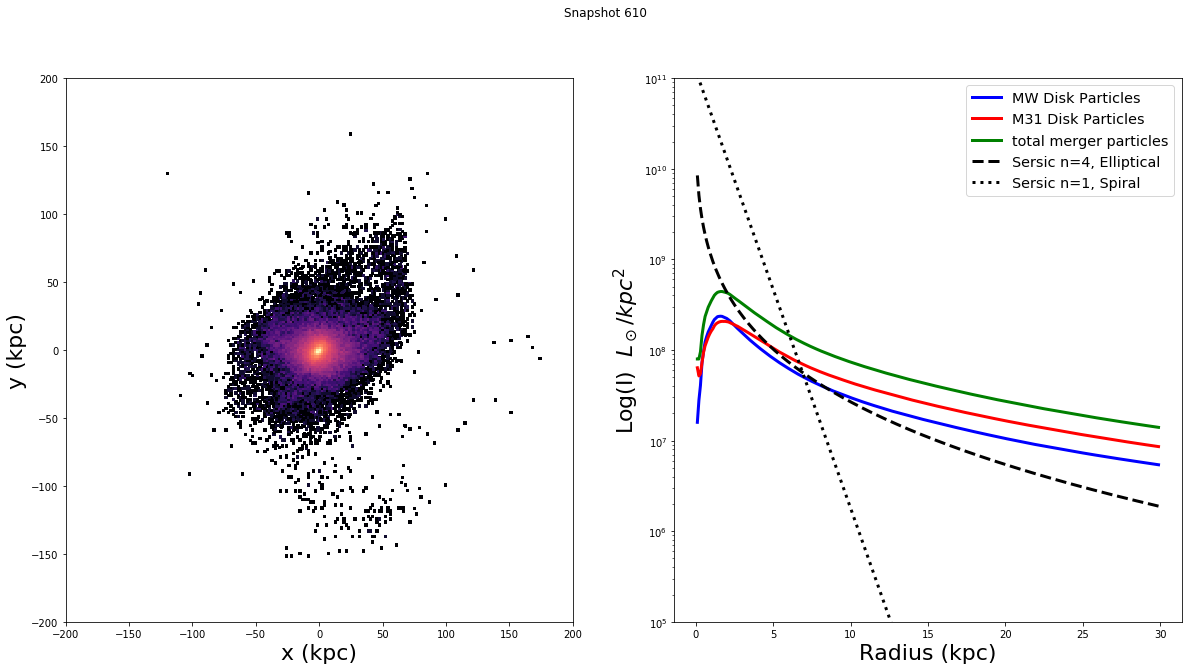

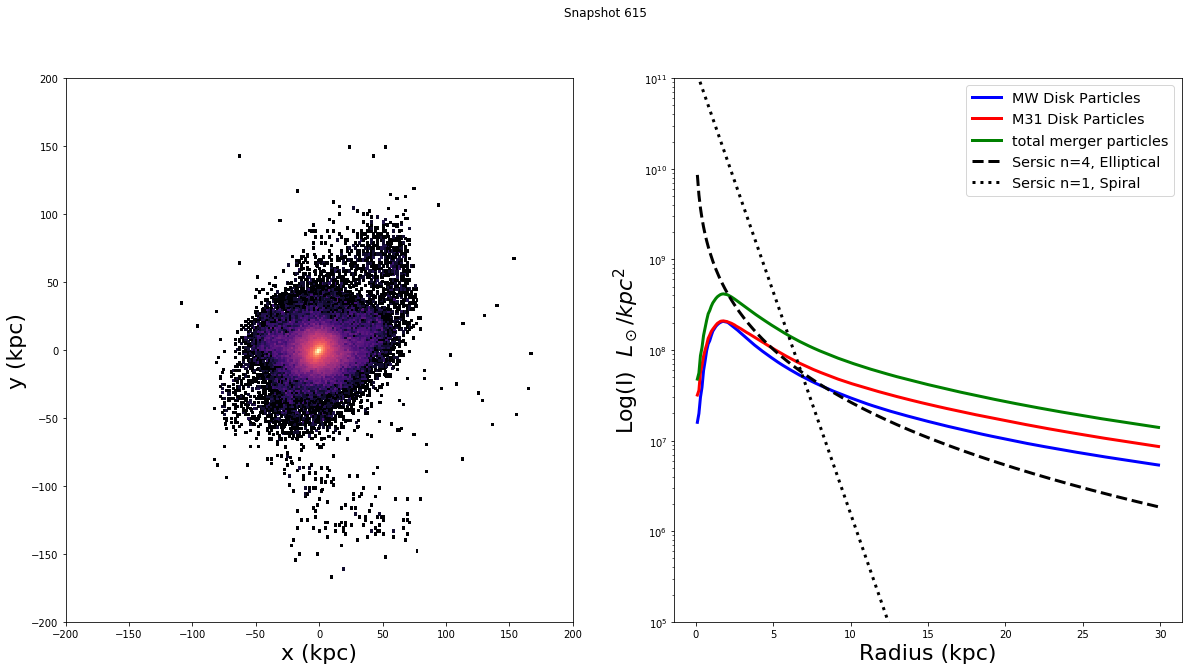

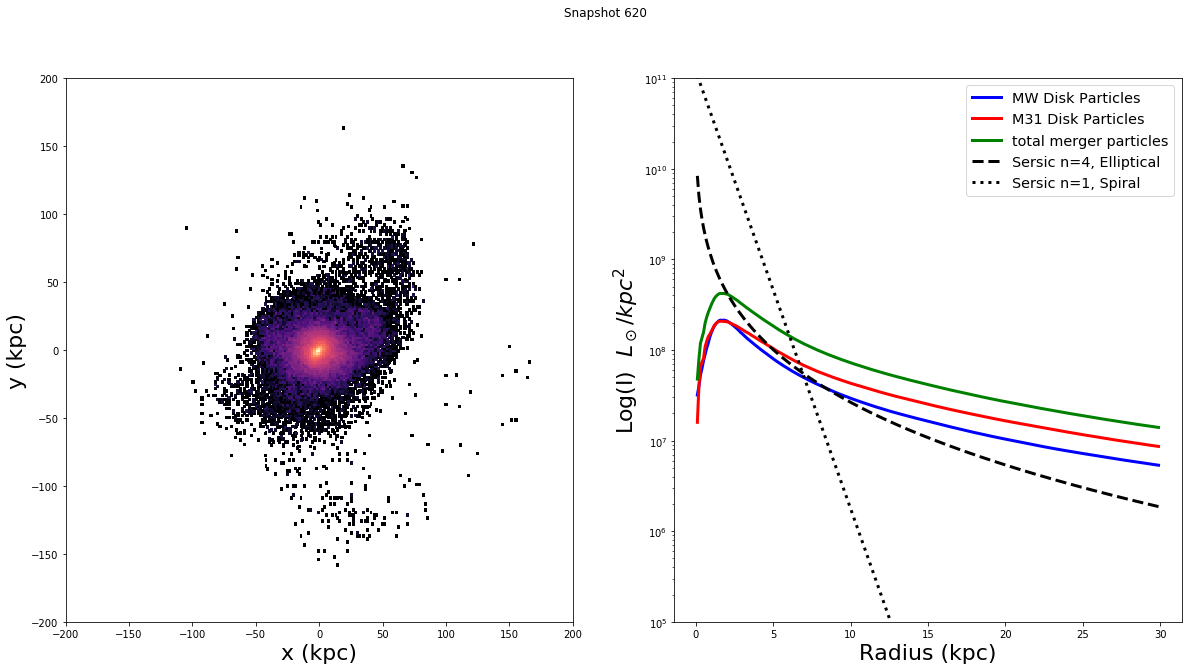

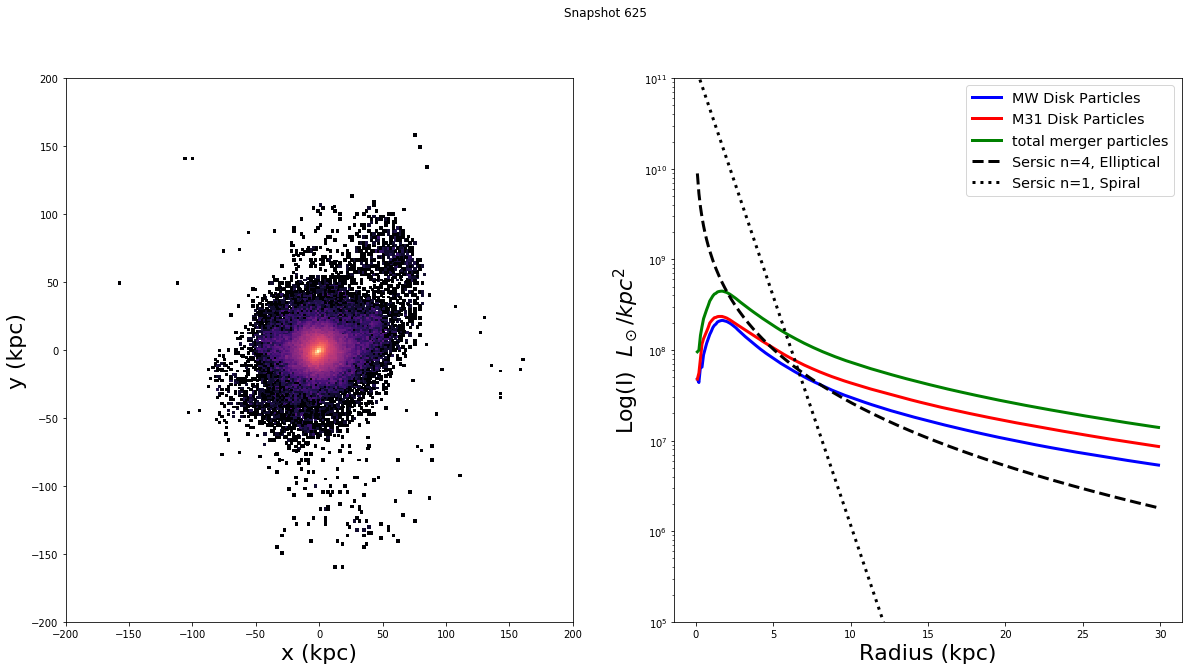

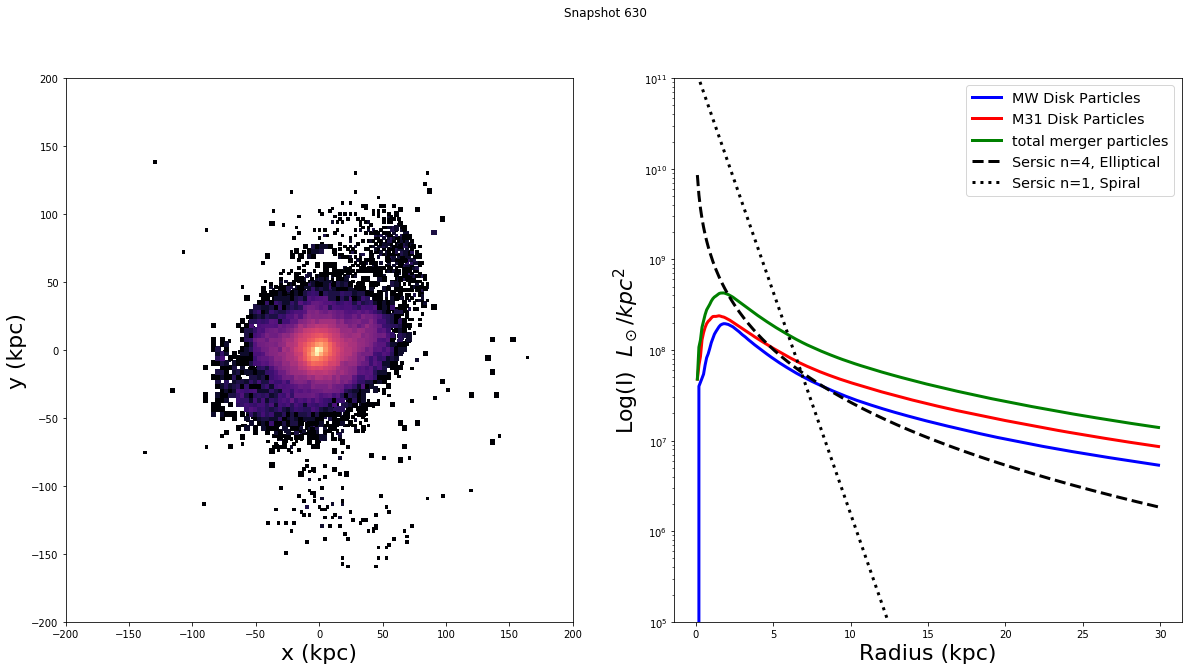

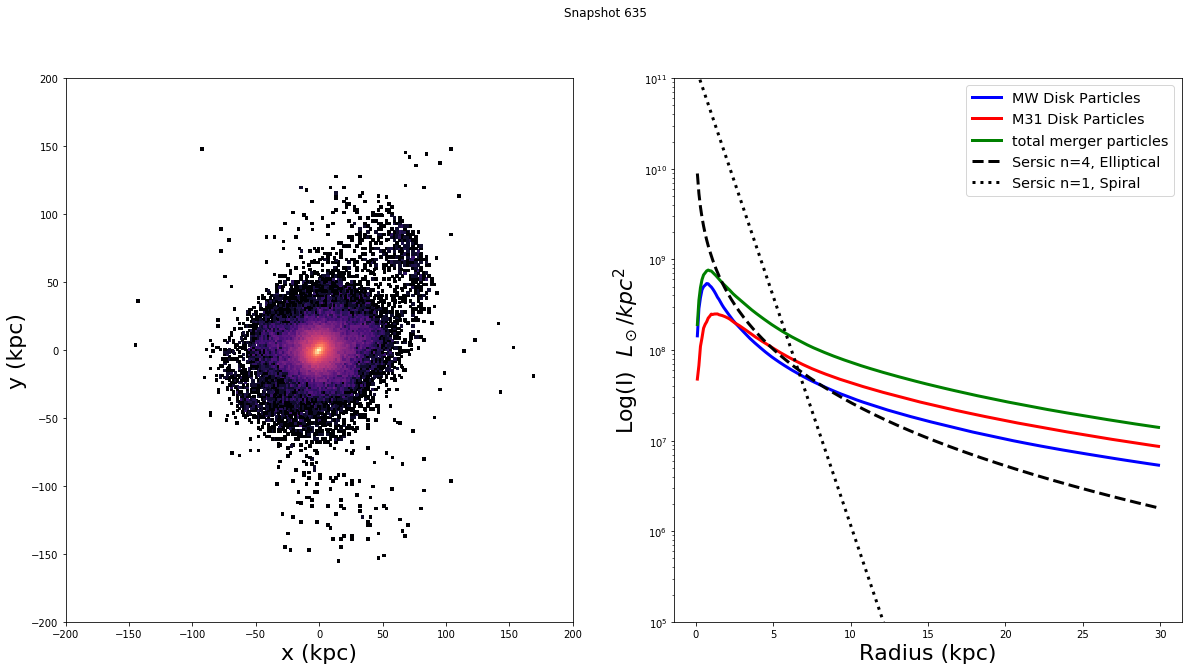

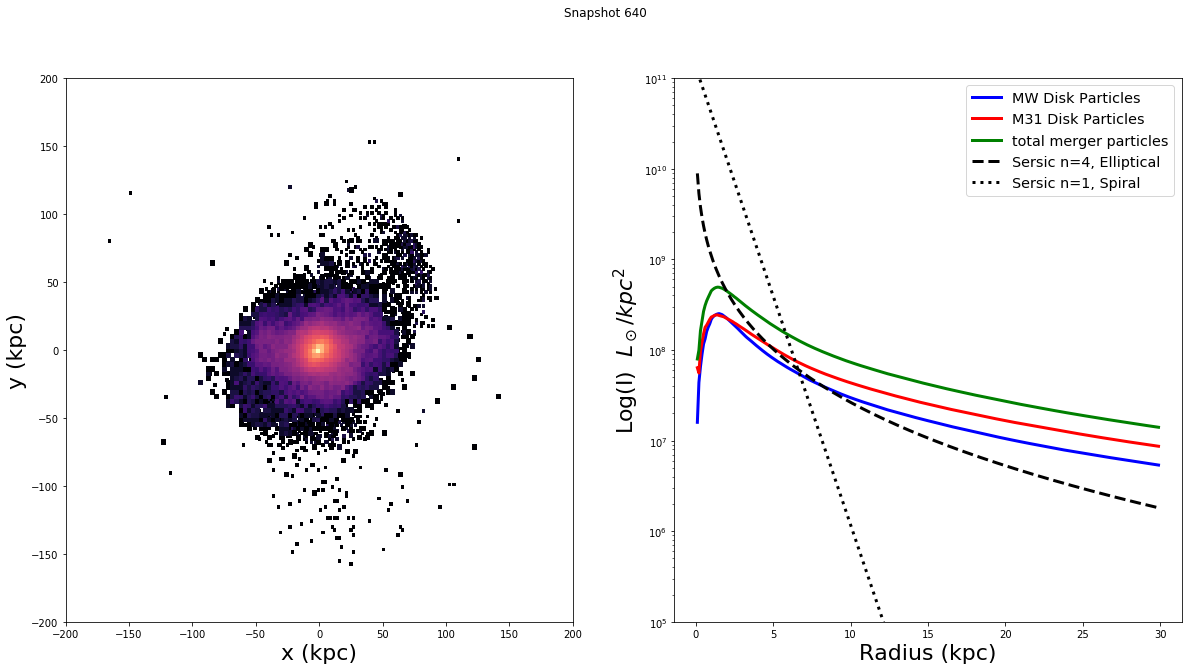

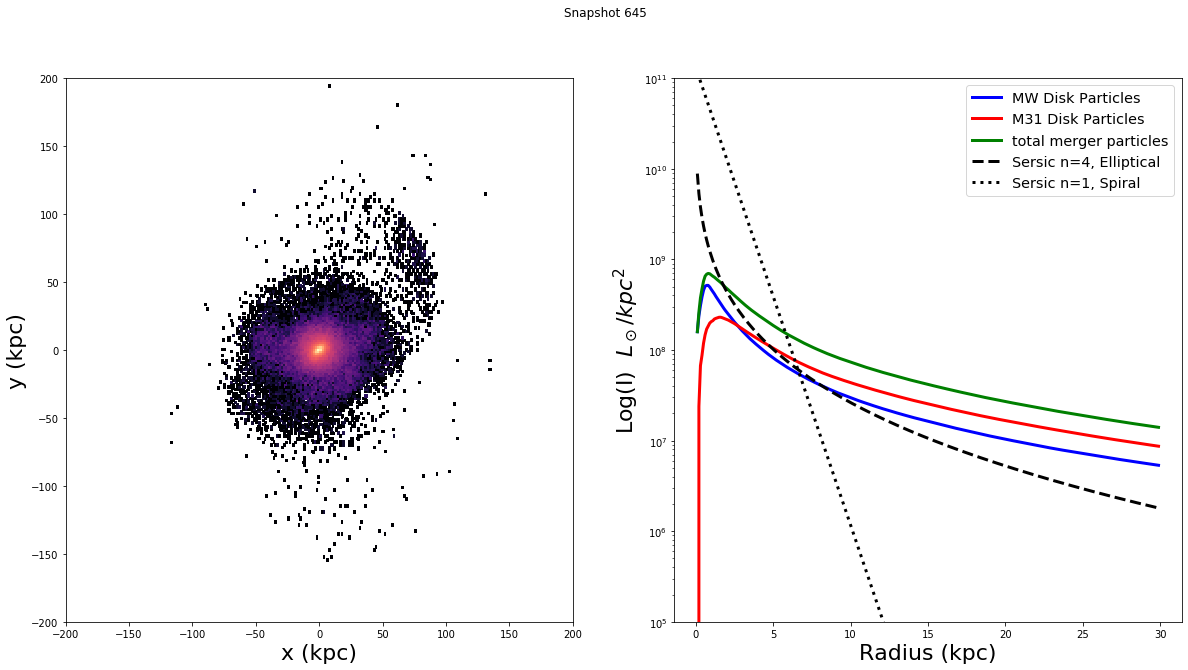

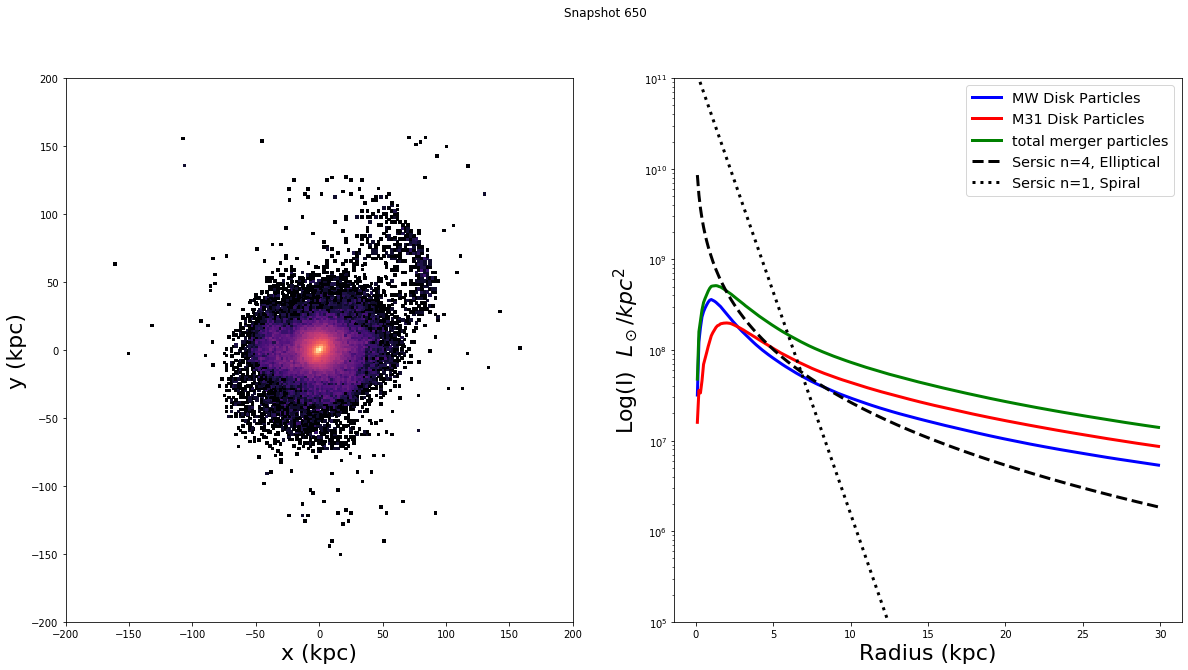

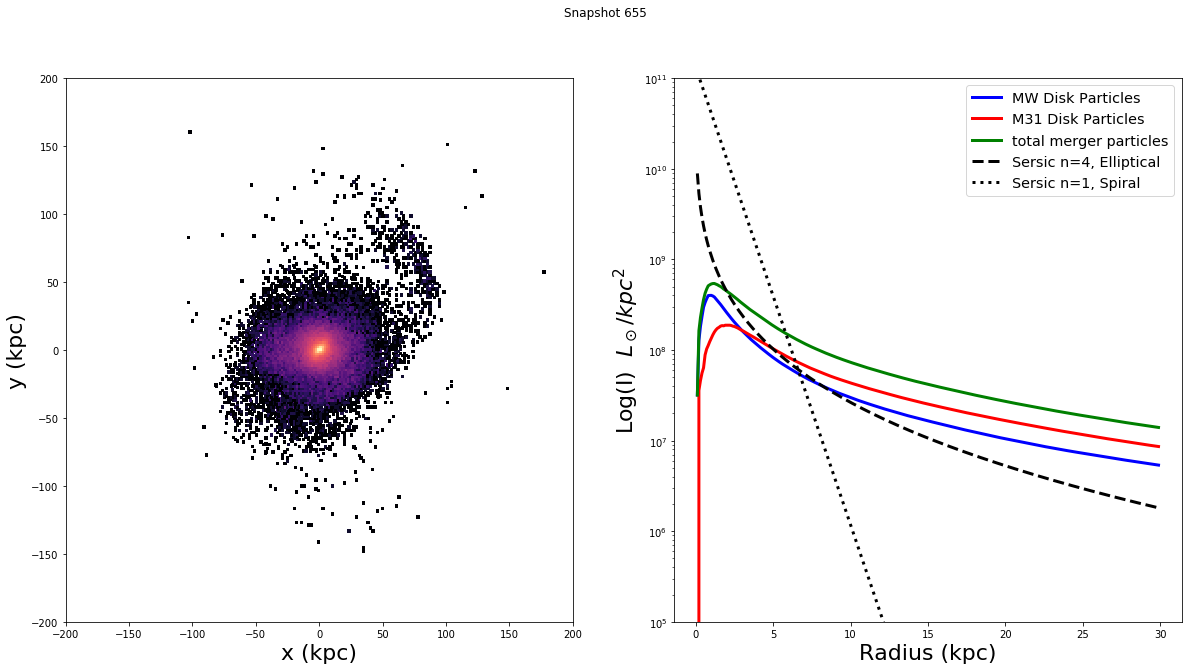

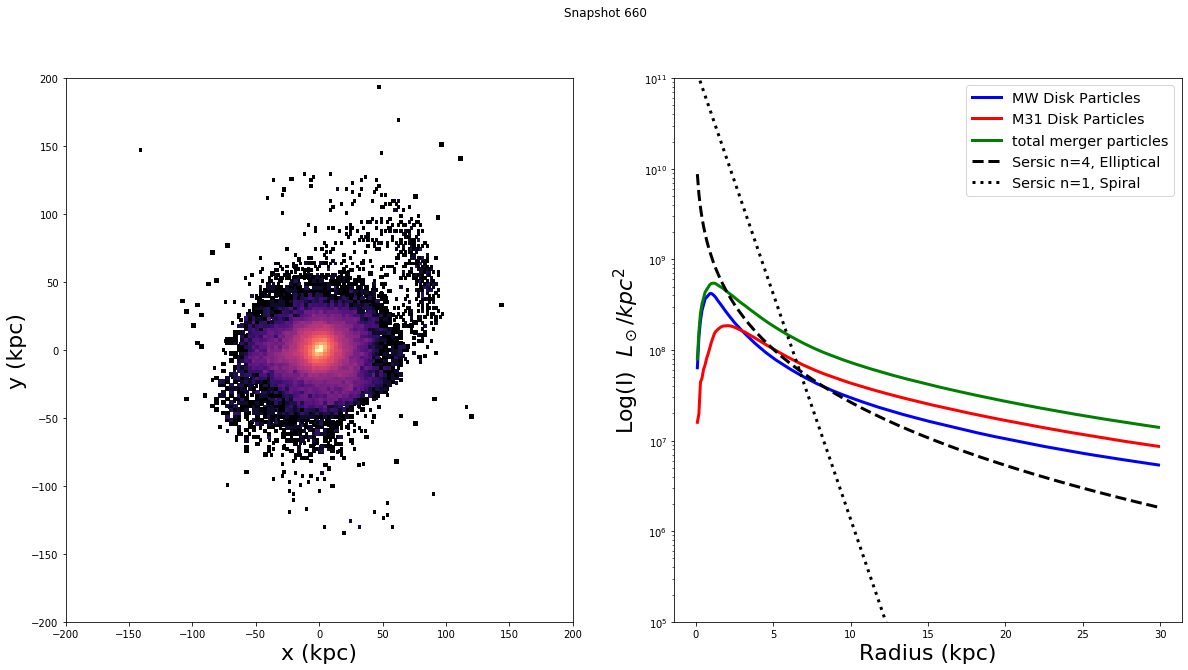

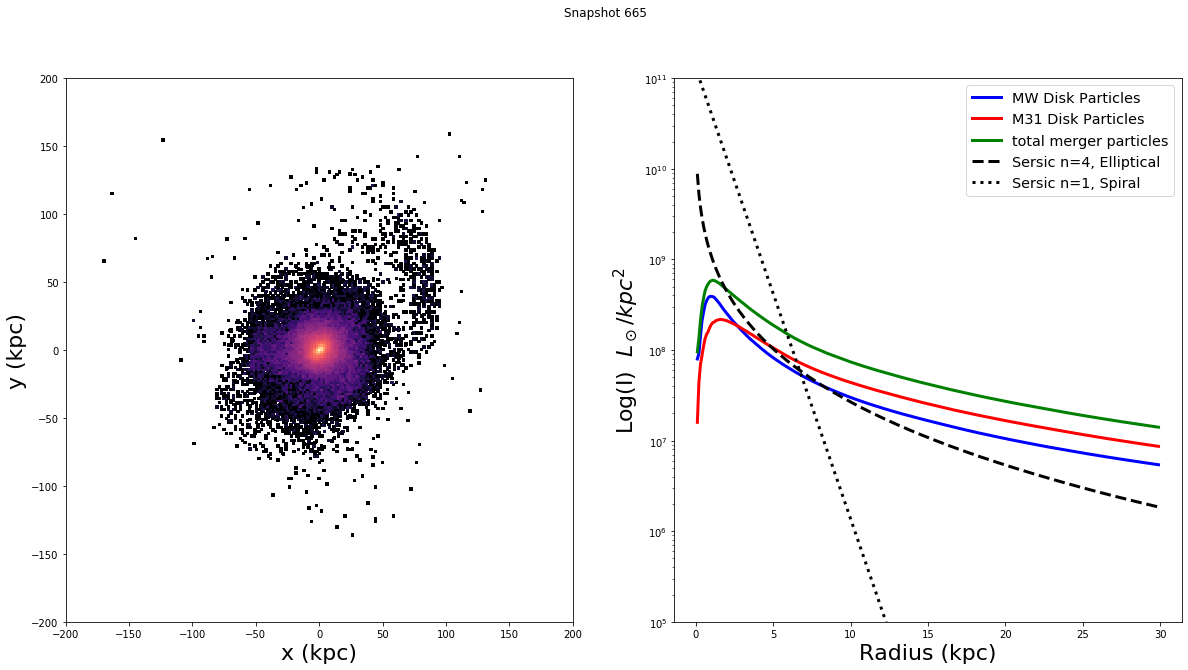

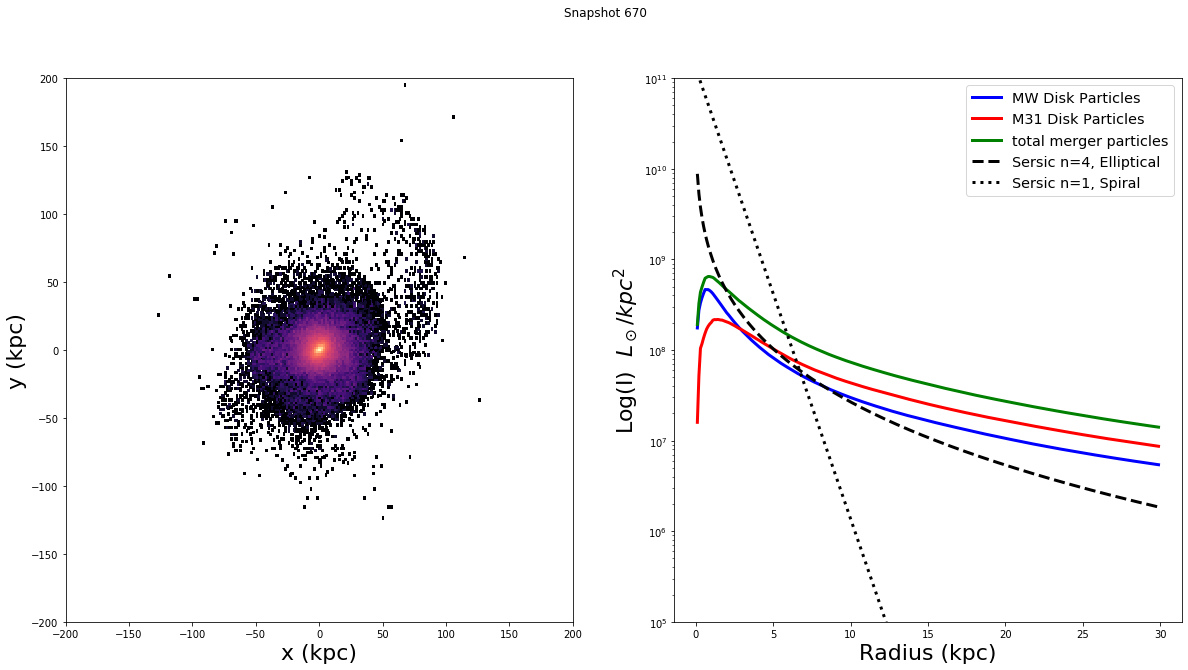

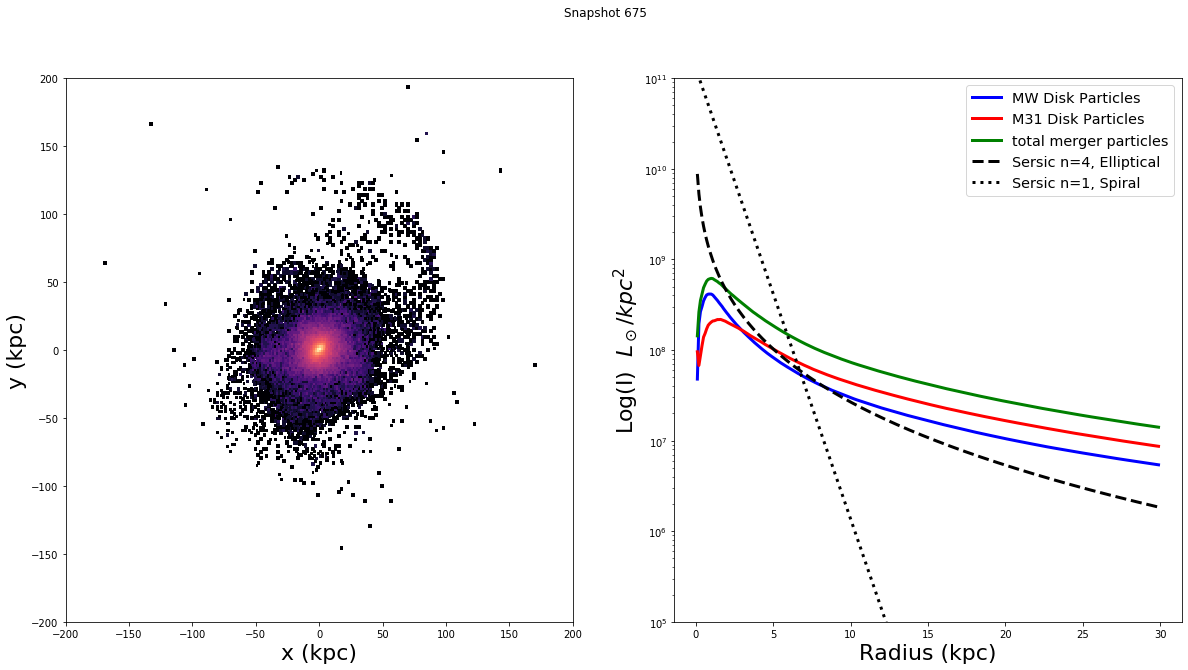

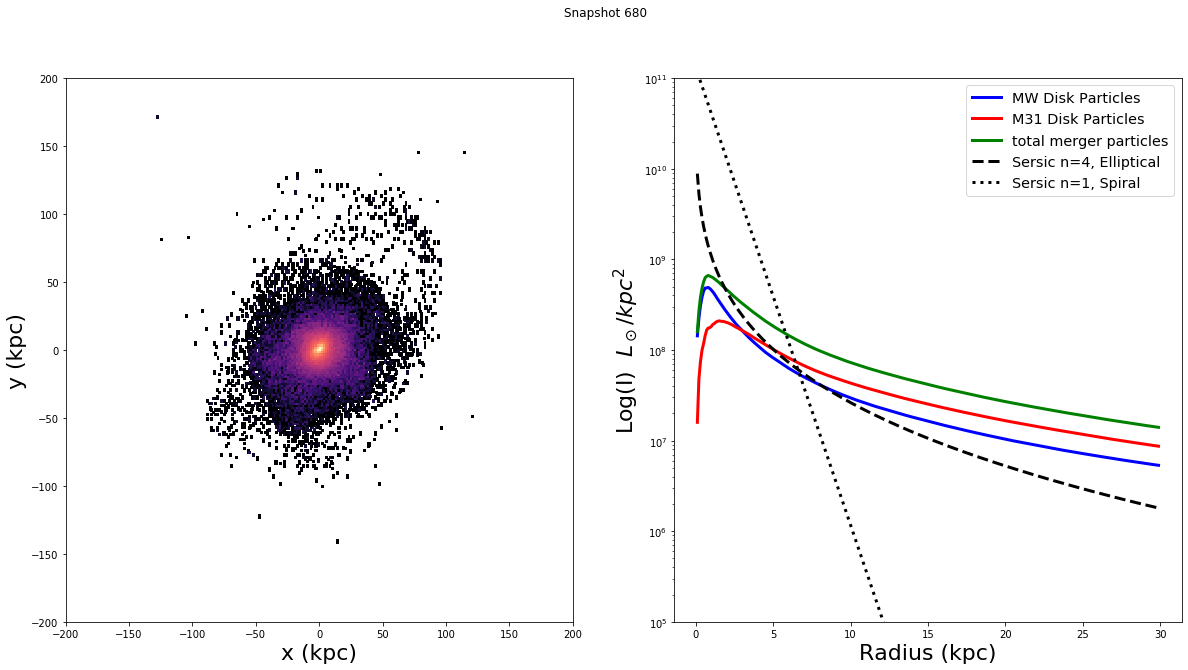

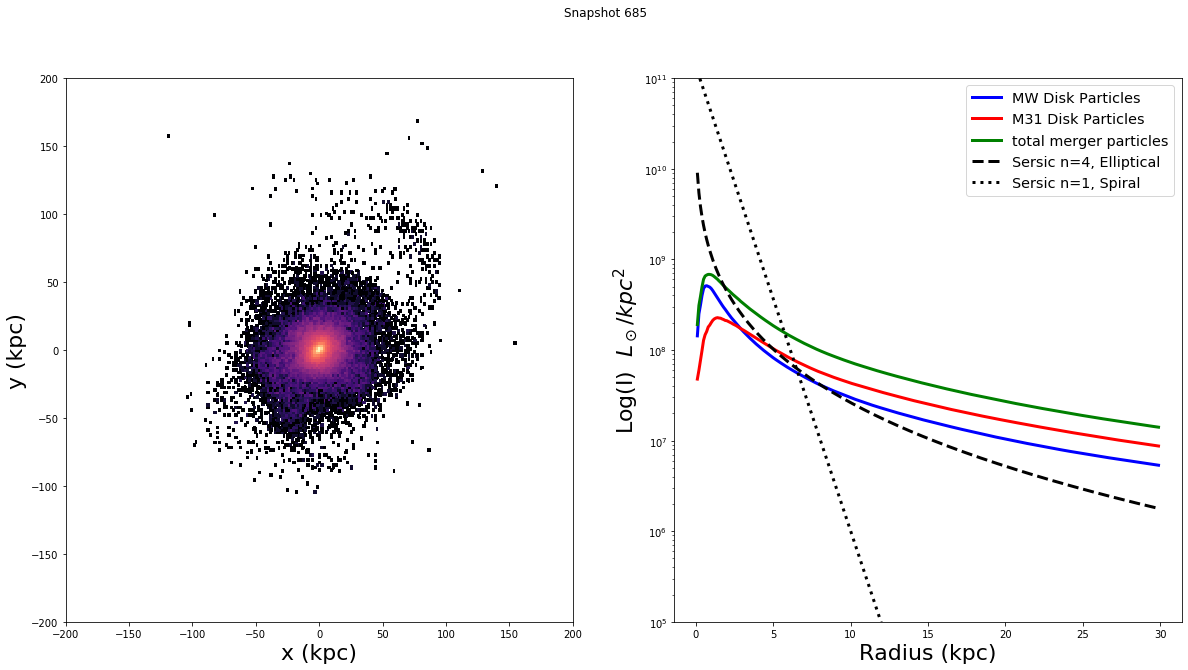

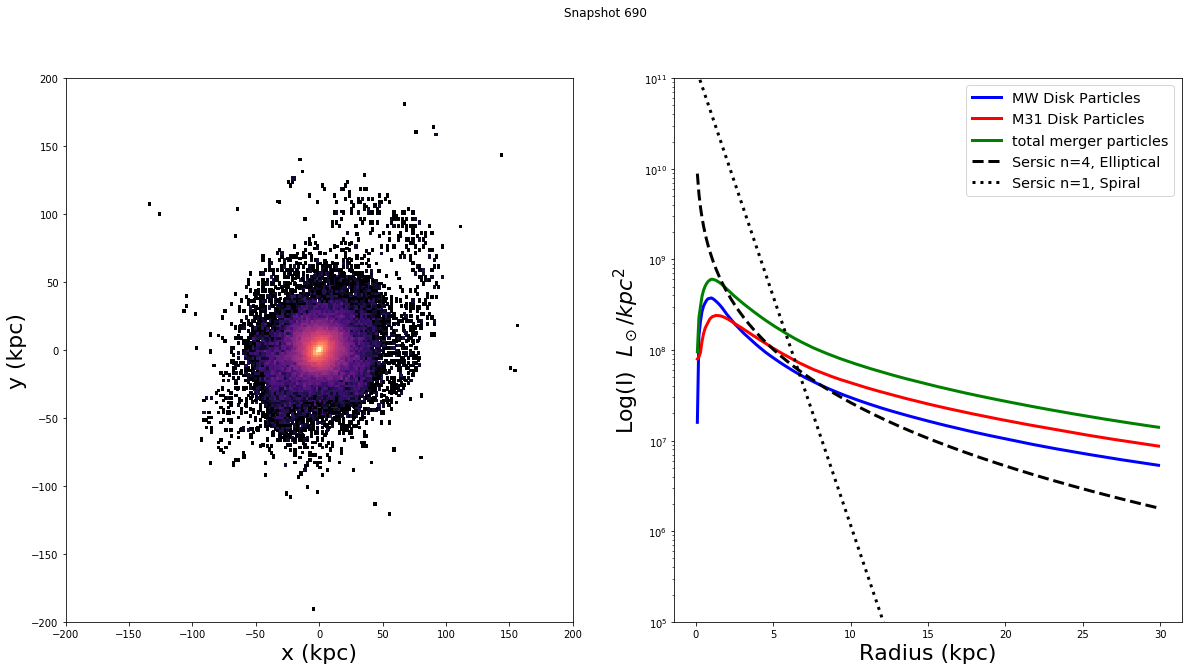

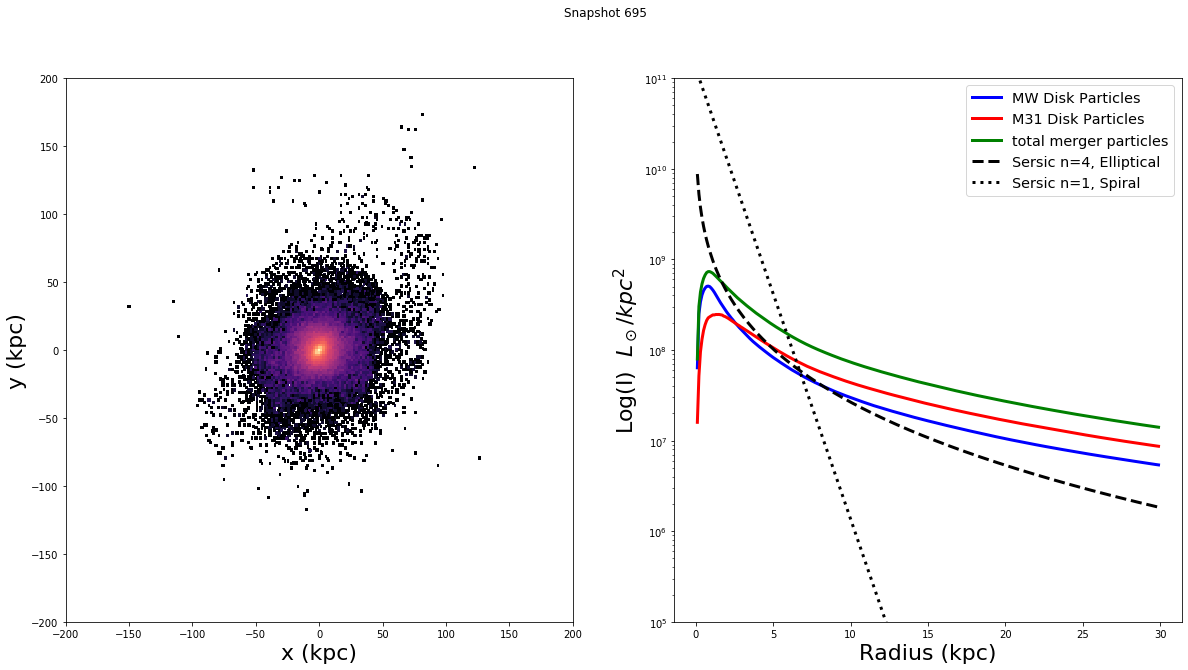

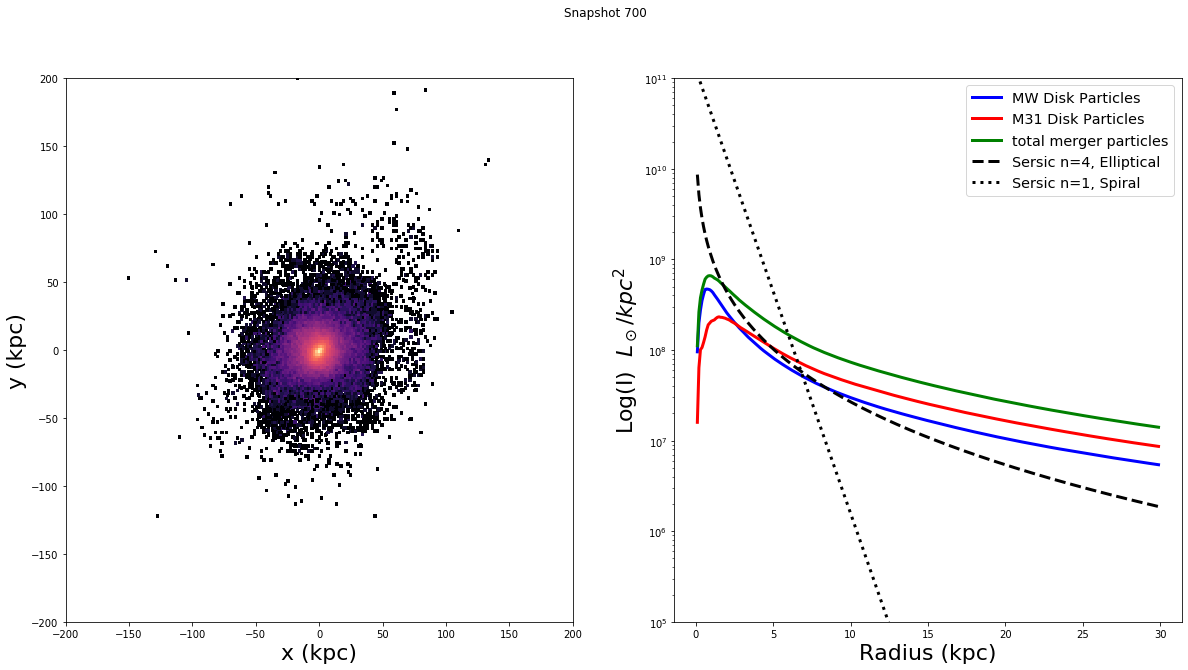

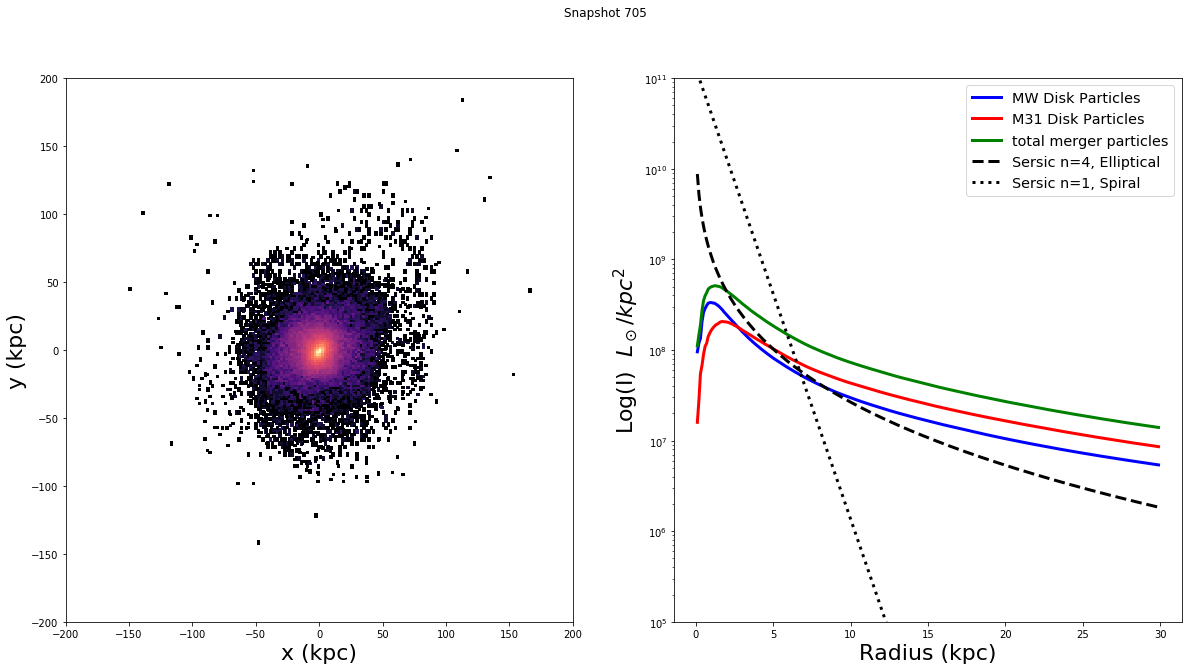

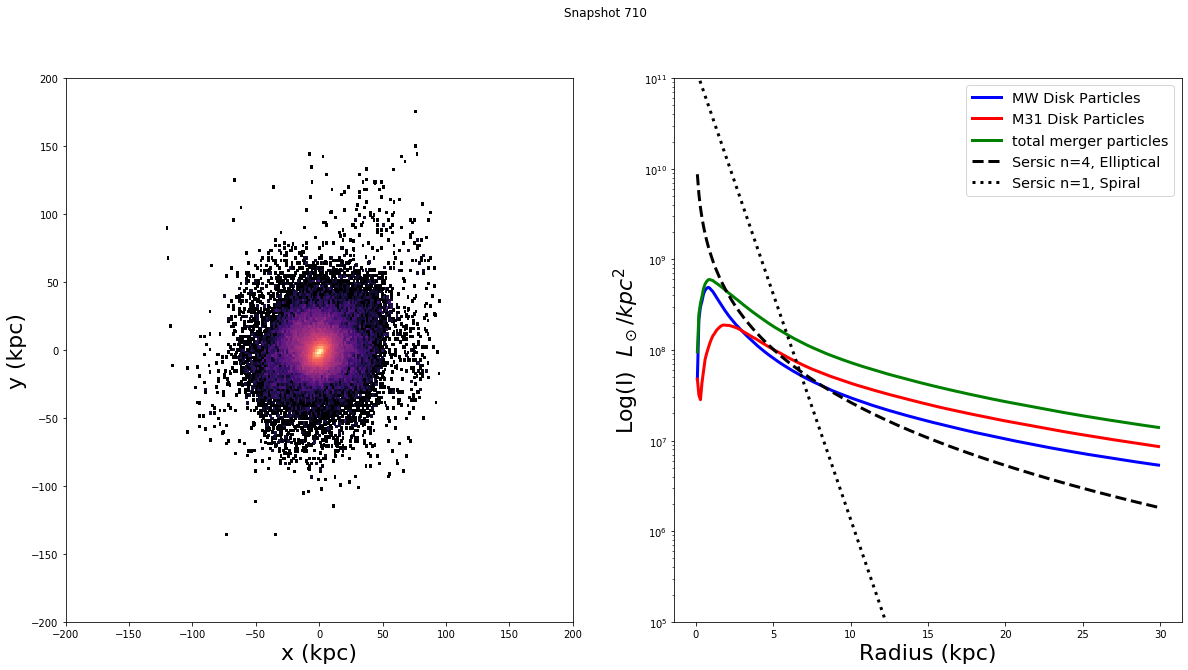

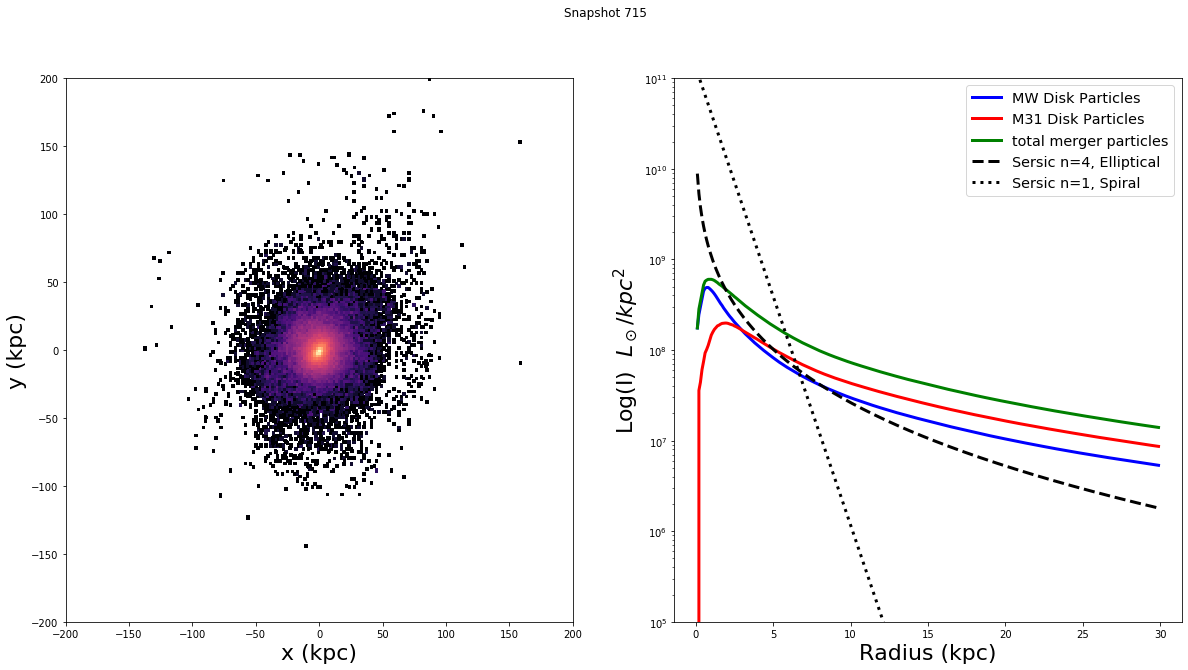

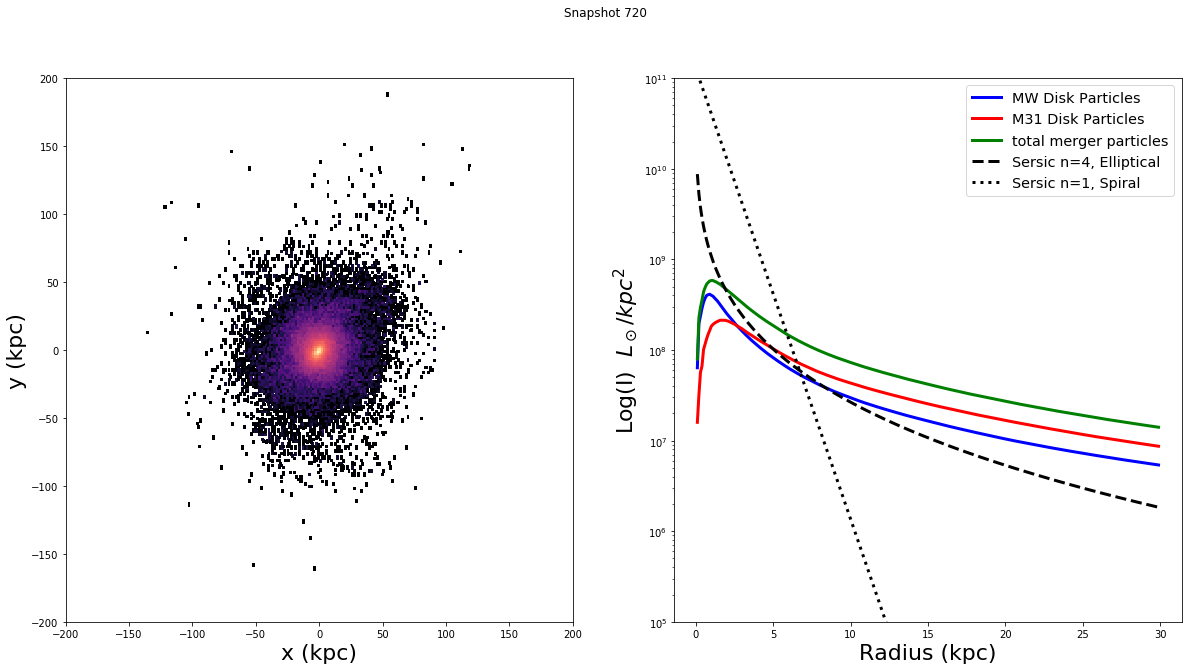

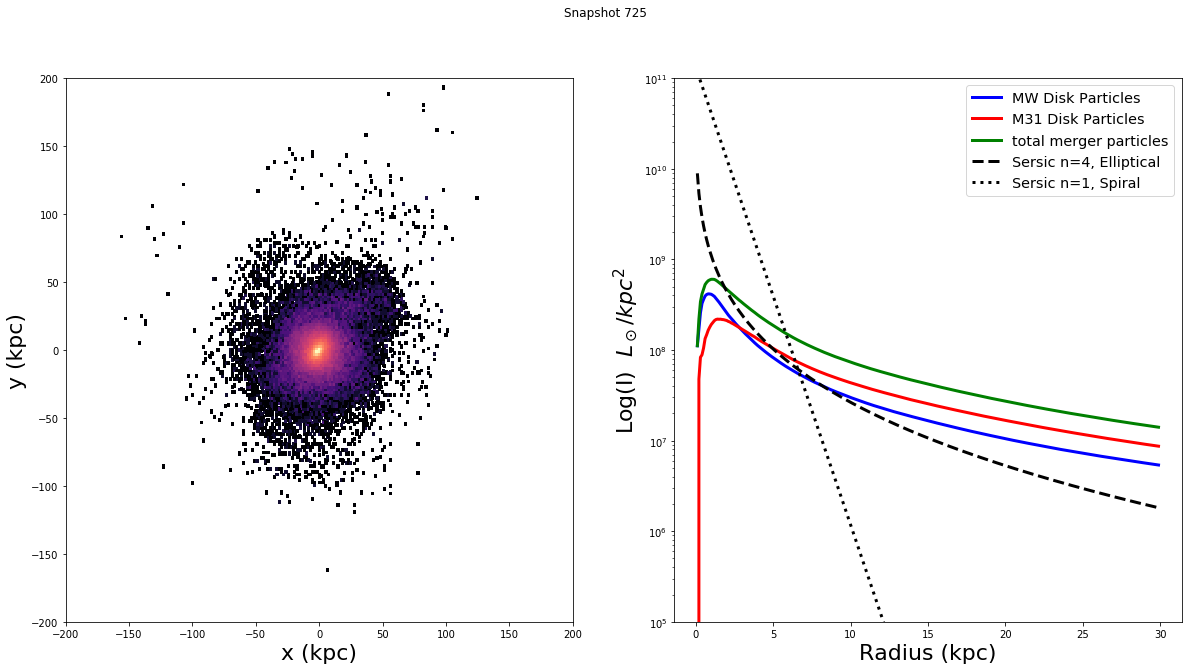

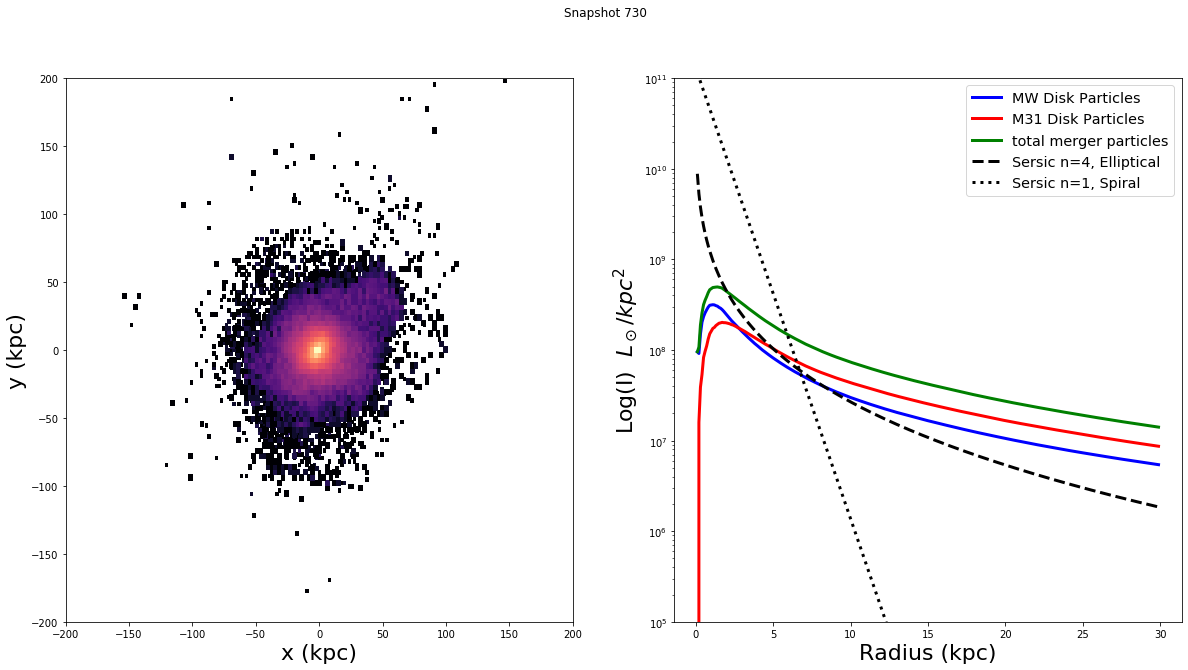

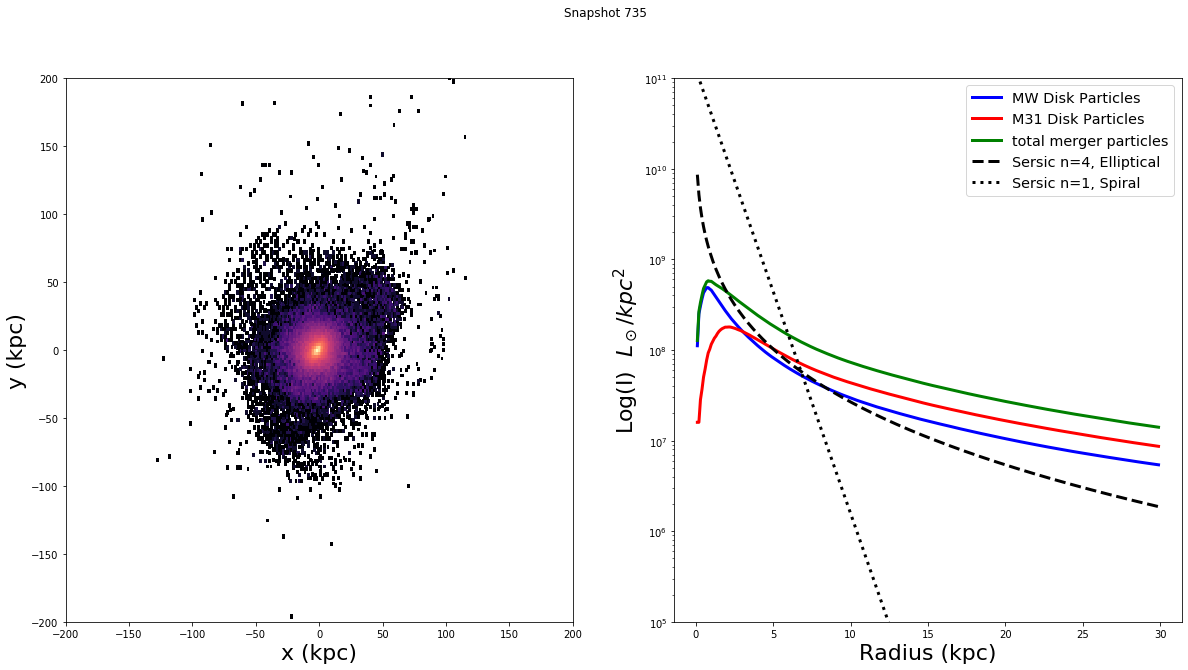

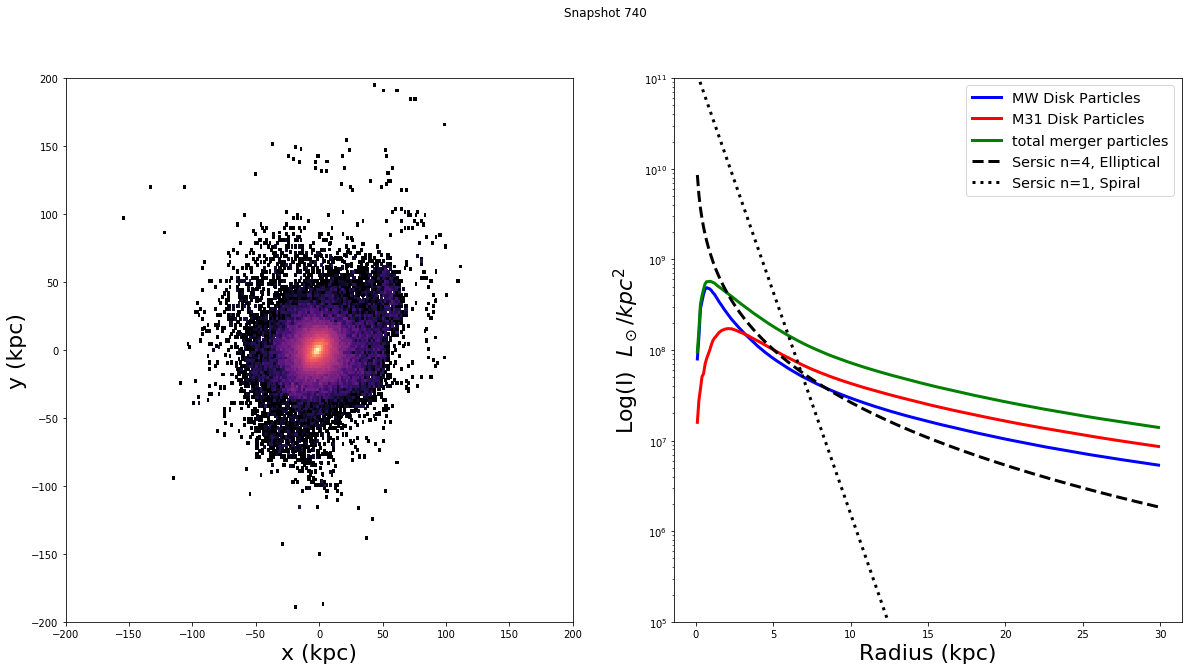

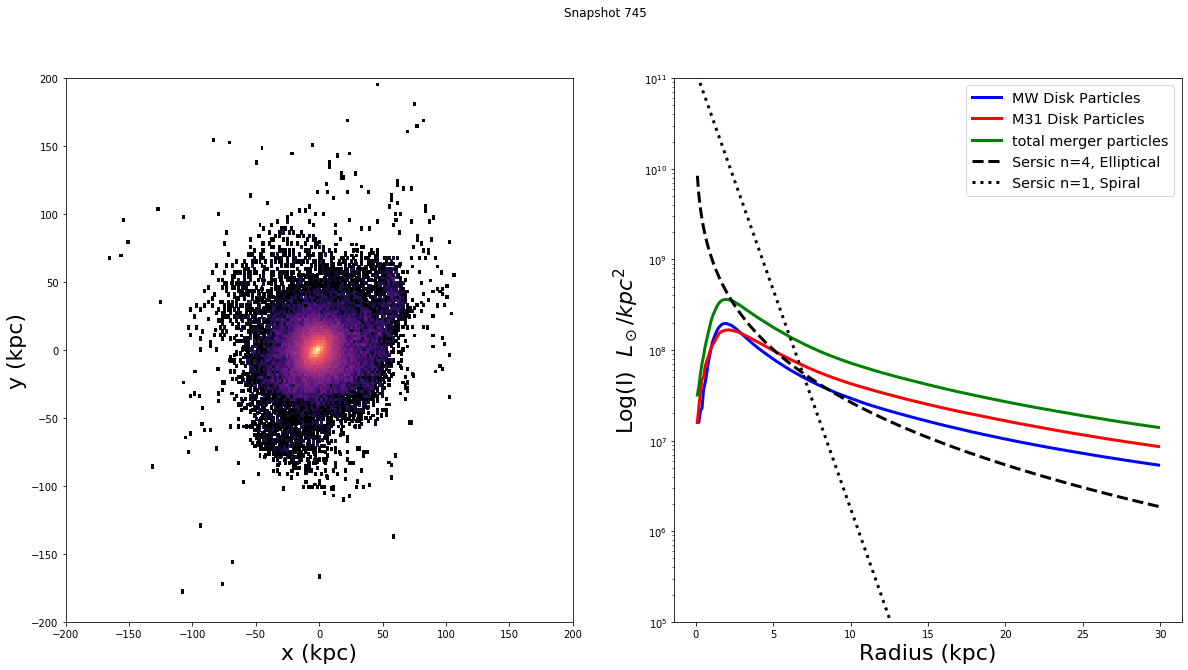

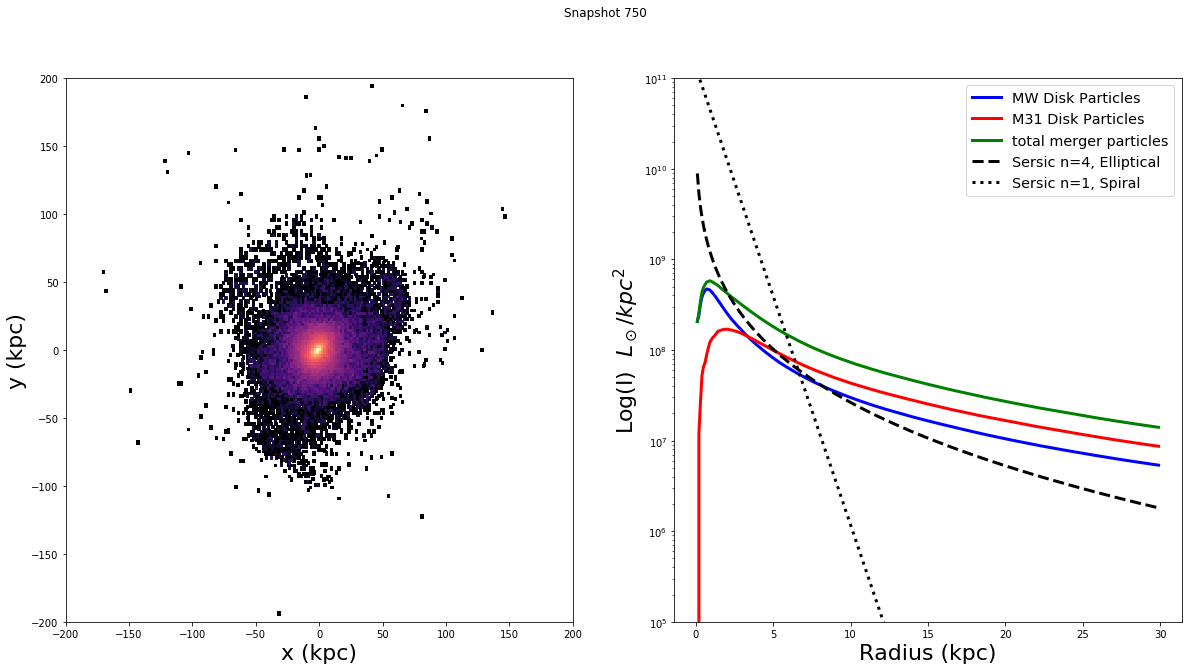

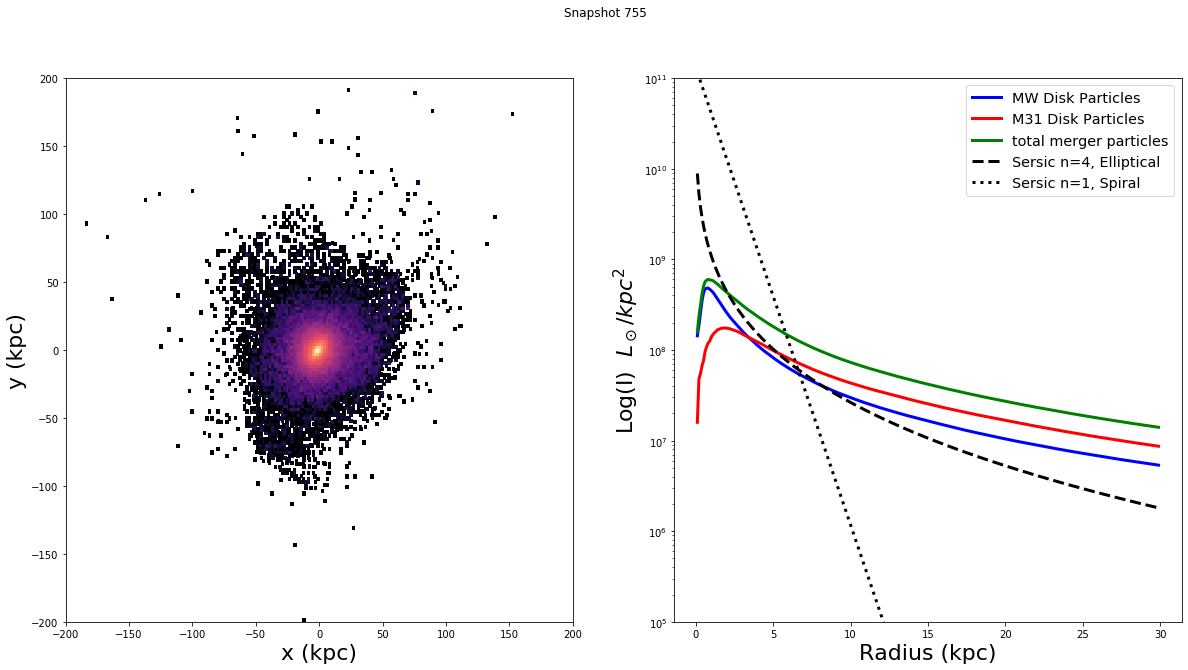

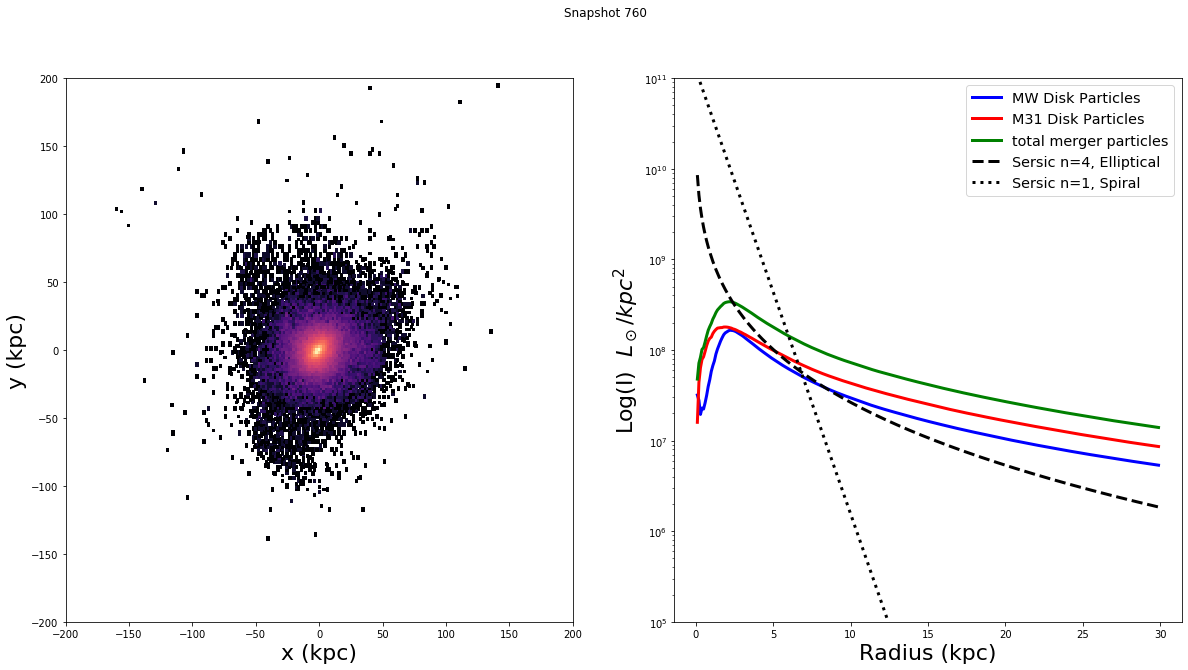

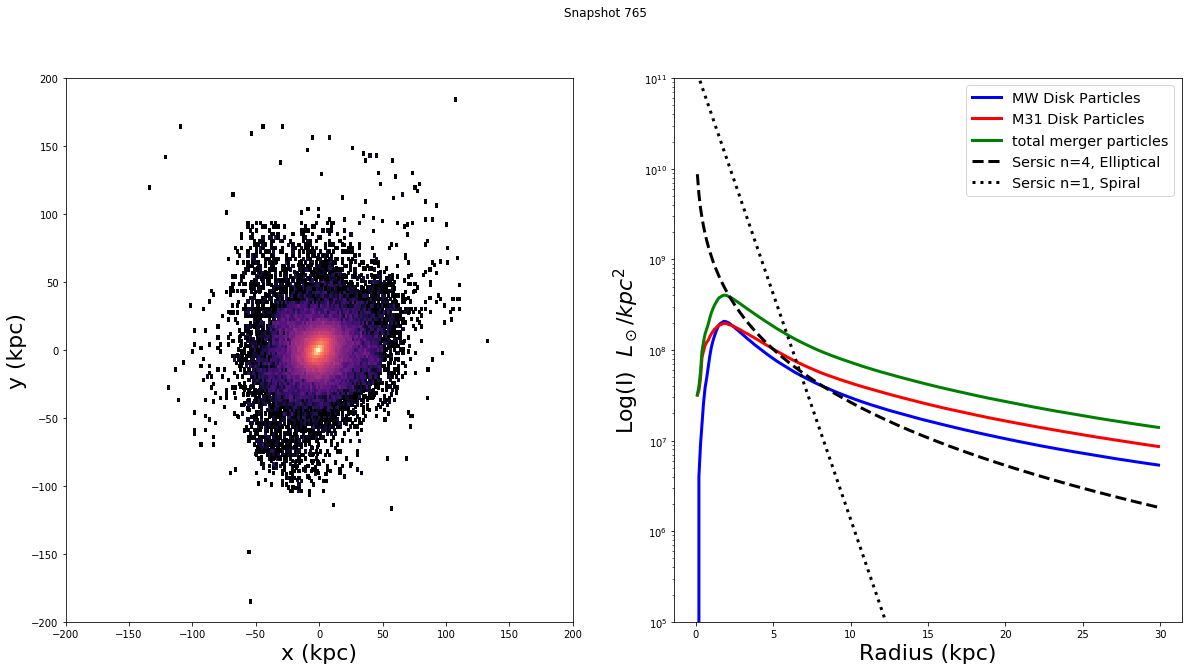

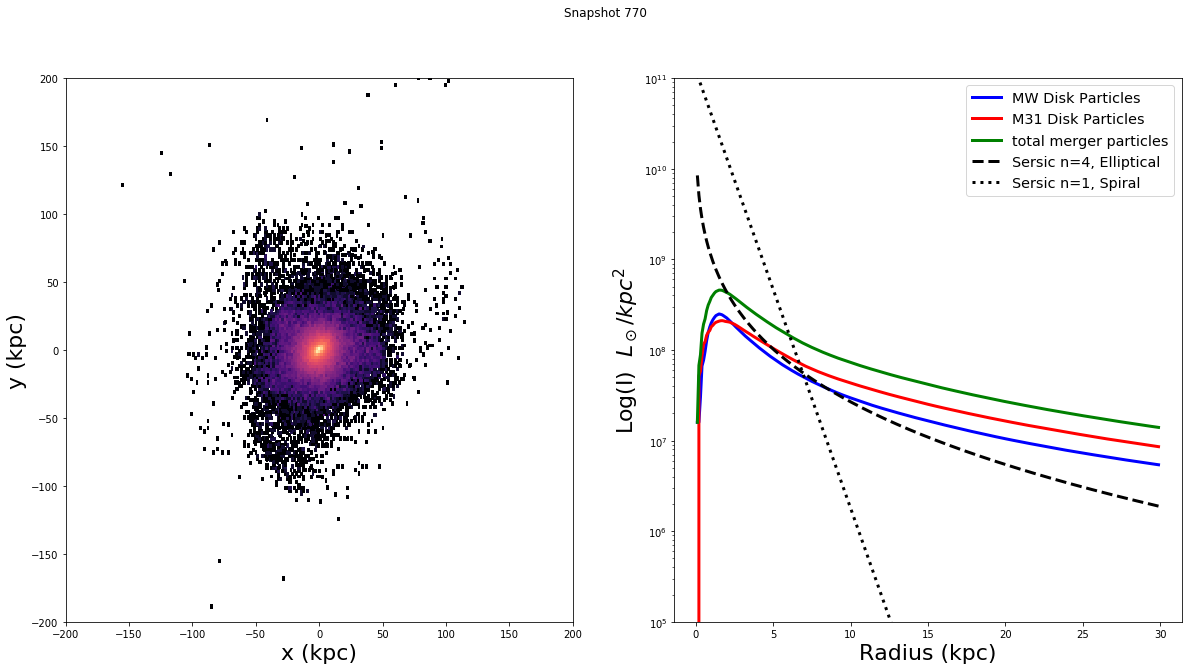

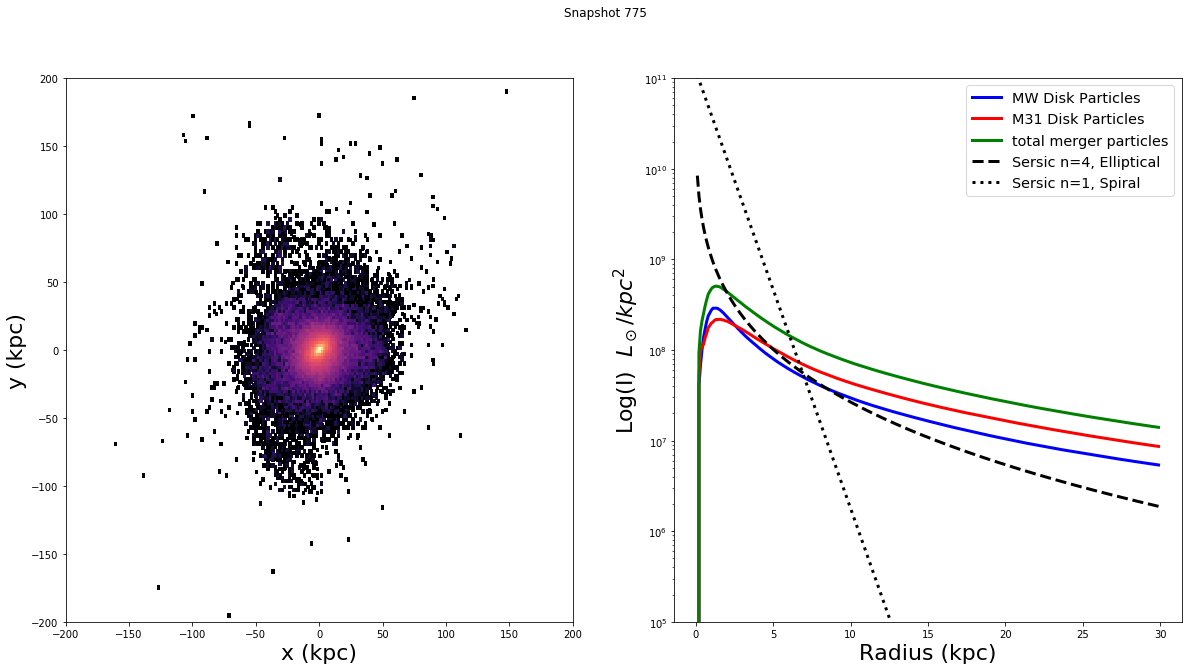

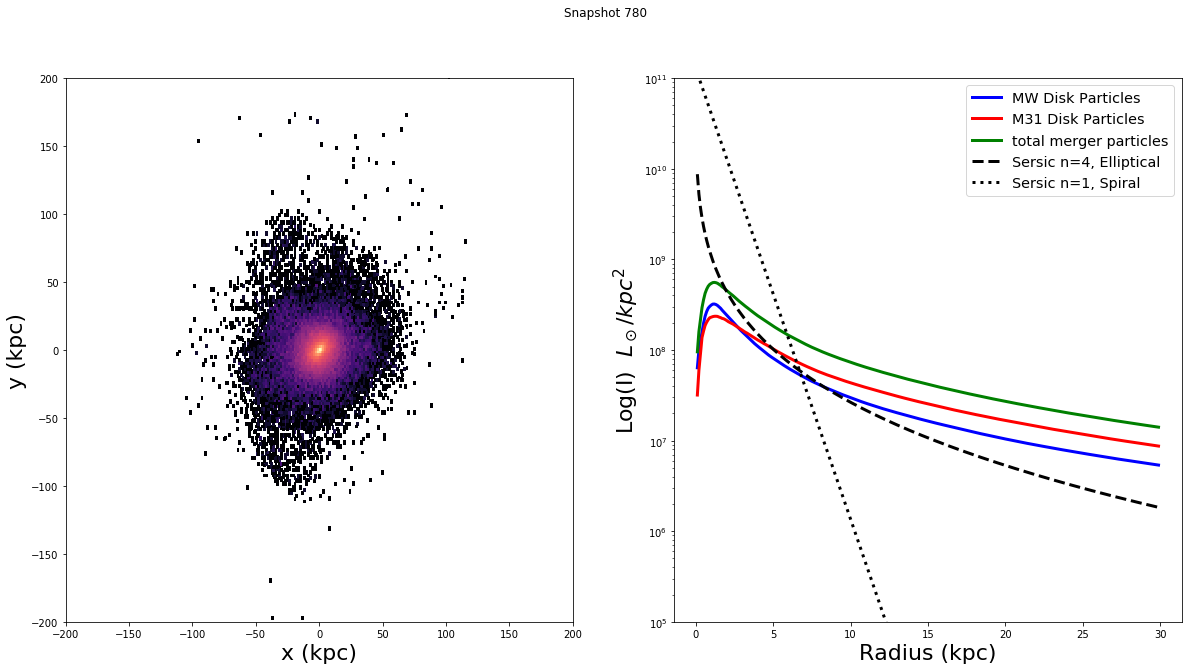

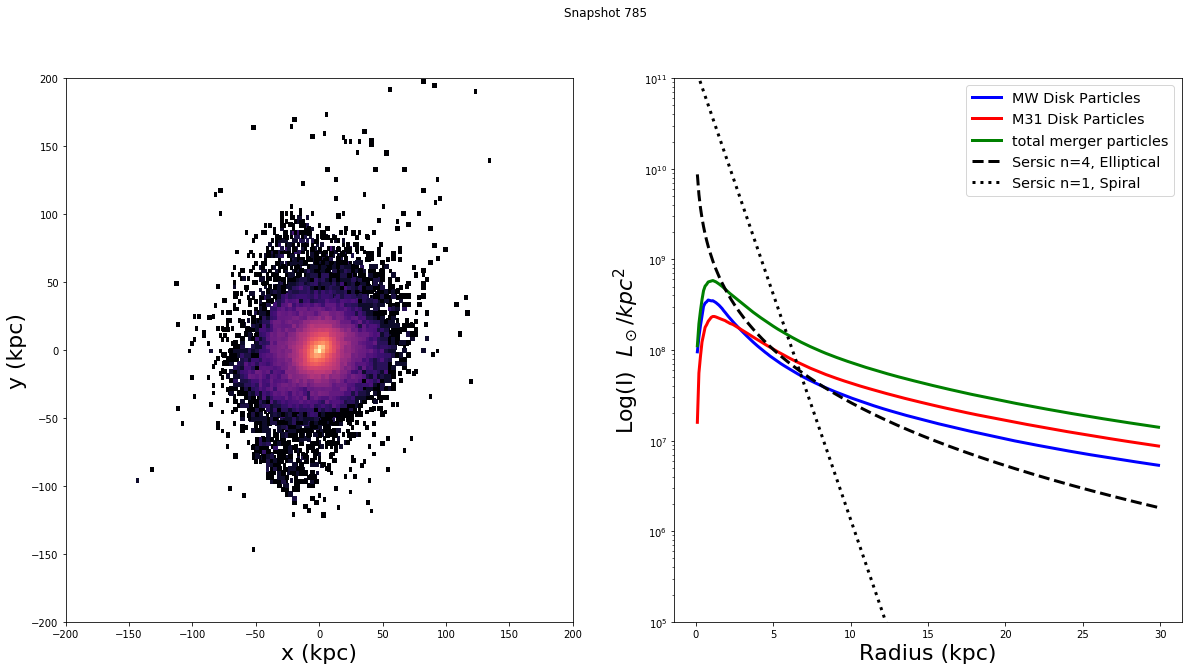

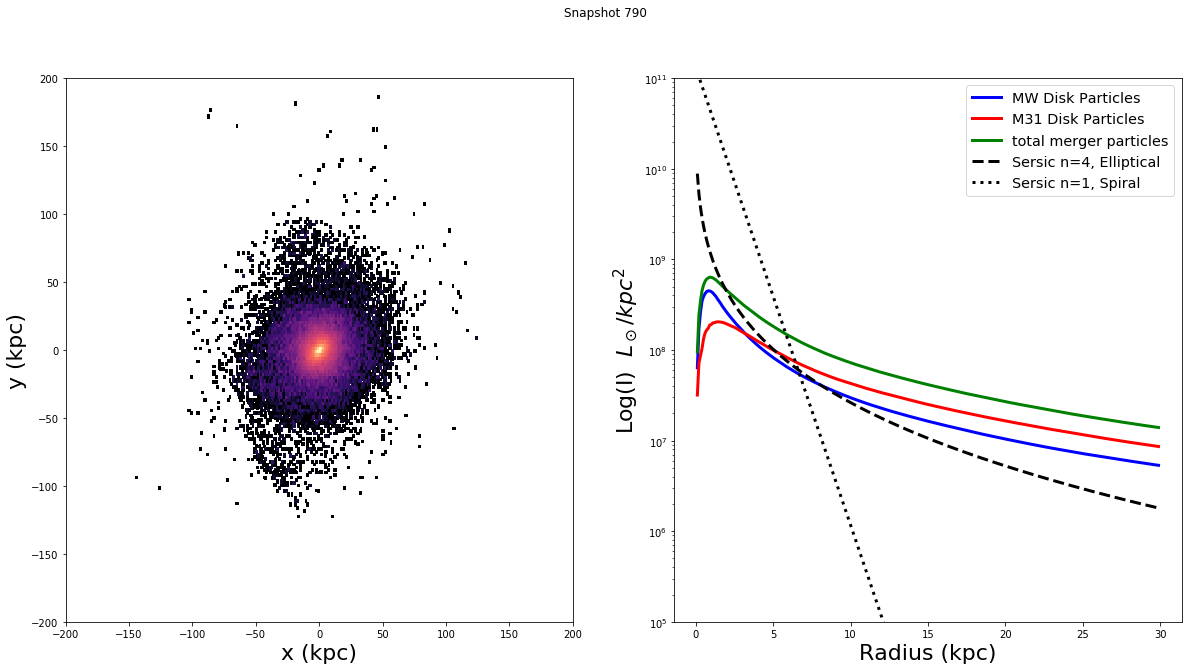

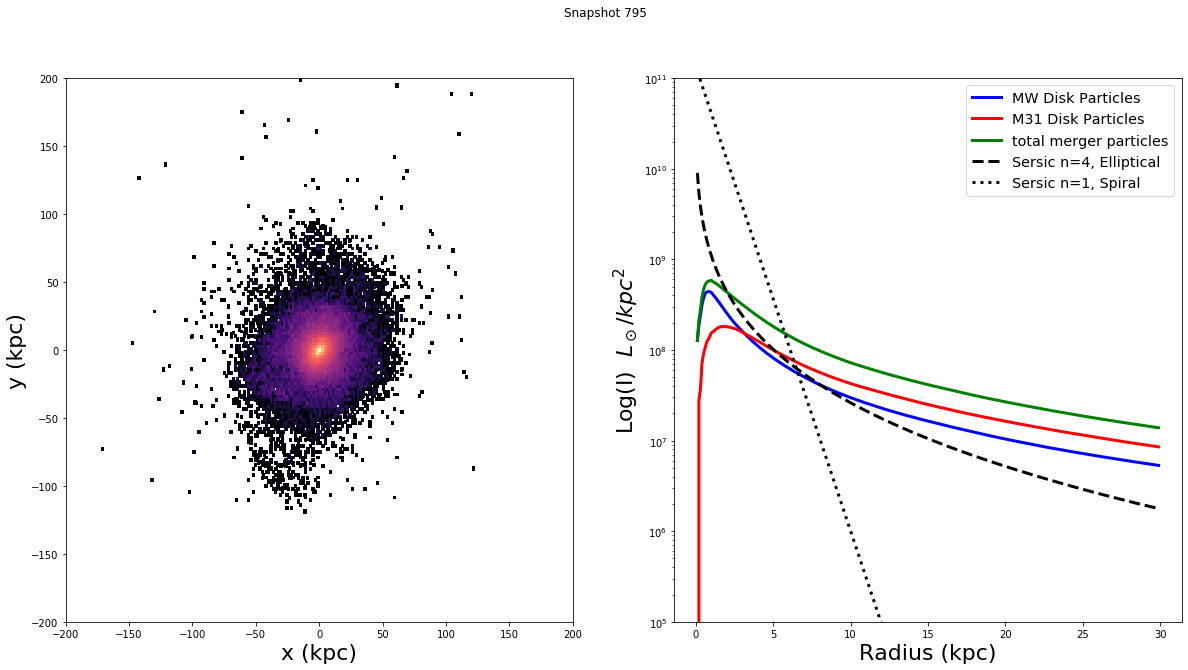

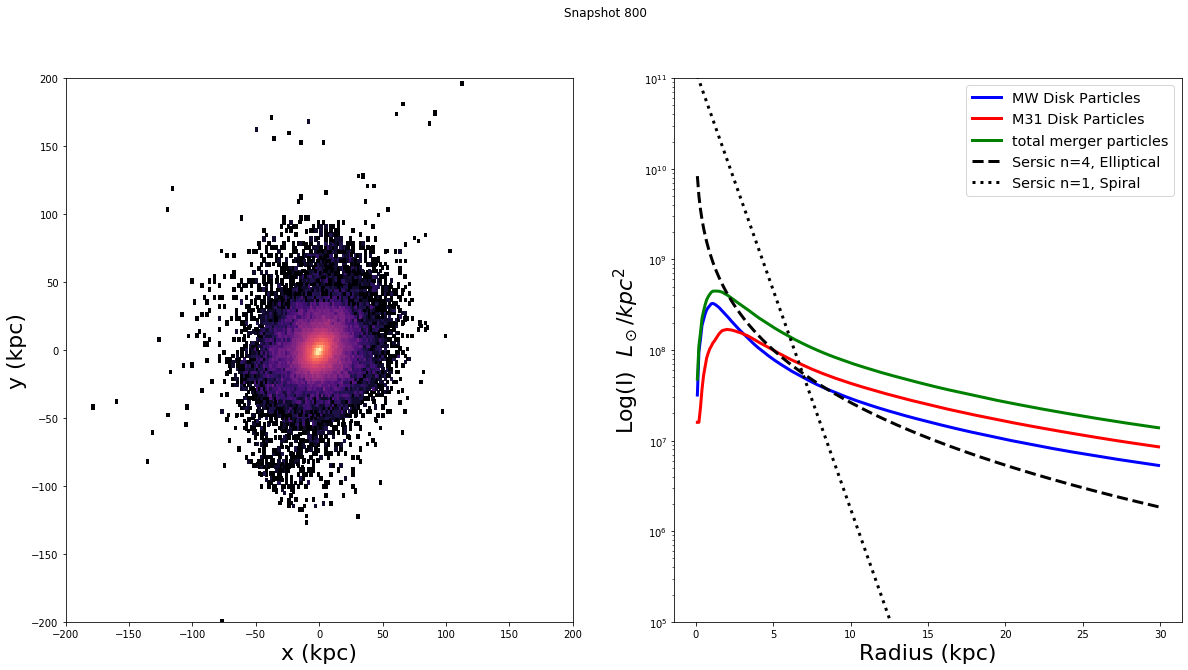

In [5]:
#here I'll be compiling the data for the x and y position of stellar disk particles in the merger and the sersic 
#profile of the whole merger as well as individual galaxy particles, and then plot these side by side
#I'll be looking at snapshots 400-800: snapshot 400 was chosen as the start due to it being determined to be 
#near the start of the first encounter of the milky way and M31
#snap shots for now 5 at a time for ease with computing- would like to cut this step down eventually

#Particle position code was mostly taken from lab 7, just adopted in loop form similar to work in homework 6
#Sersic code adapted from lab 6



time = np.arange(400,805,5)

#function for Sersic profile- taken from lab 6
def SersicE(R,Re,n,Mtot):
    #inputs:
        #R - the radius (units: kpc)
        #Re- the half light radius (units: kpc)
        #n - Sercic Index
        #Mtot - total stellar mass of the system (untis: Msun)
    #Returns:
        #Surface brightness profile (units: Lsun/kpc^2)
    
        #assume mass to light = 1
    L = Mtot #total luminosity = total stellar mass
    
        #from equation above for Ie
    Ie = L/7.2/np.pi/Re**2

        #exponent term
    A = (R/Re)**(1/n)-1

    return Ie*np.exp(-7.67*A)


for i in time:
    
    
#part 1a- data for the x-y particle position
    ### Identifying which file/snapshot using ###
    #print(i)
    #add a string of the filenumber to the value "000"
    ilbl = '000' + str(i)
    
    #remove all but the last 3 digits
    ilbl = ilbl[-3:]
    
    
    #define filename for MW Galaxy snapshots 
    MWfilename = "MW_VLowRes/MW_" + ilbl + '.txt' 
    #define filename for MW Galaxy snapshots 
    M31filename = "M31_VLowRes/M31_" + ilbl + '.txt'
    
    #print(MWfilename)
    #print(M31filename)
    
    ### X and Y position 
    #create center of mass object using disk particles
    COM_MW = CenterOfMass(MWfilename, 2)
    COM_M31 = CenterOfMass(M31filename,2)
    
    #COM position by Galaxy
    #MW
    COMP_MW = COM_MW.COM_P(0.1)
    #M31
    COMP_M31 = COM_M31.COM_P(0.1)
    #just the position based on the coordinates from CenterofMass outplut
    MWx = COM_MW.x-COMP_MW[0].value
    MWy = COM_MW.y-COMP_MW[1].value
    M31x = COM_M31.x-COMP_M31[0].value
    M31y = COM_M31.y-COMP_M31[1].value
    
    
#part 1b- data for Sersic profile
    
    #ilbl = '000' + str(i)
    #print(ilbl)
    #remove all but the last 3 digits
    #ilbl = ilbl[-3:]
    
    #create sersic data
    MW = MassProfile("MW_VLowRes/MW",ilbl)
    M31 = MassProfile("M31_VLowRes/M31",ilbl)
    
    #create an array of radii
    r = np.arange(0.1,30.0,0.1)

    #create mass profile of the stellar mass of both galaxies
    #use particle type 2 for this then
    MW_StellarMass = MW.MassEnclosed(2,r)
    M31_StellarMass = M31.MassEnclosed(2,r)
    MergerMass = MW_StellarMass + M31_StellarMass
    
    #compute surface mass density profile, assuming M/L ~ 1
    #I = L/4 pi D^2
    #note- spherical, may not be appropriate for a disk
    MW_StellarI = MW_StellarMass/4/np.pi/r**2
    M31_StellarI = M31_StellarMass/4/np.pi/r**2
    #total for mw and m31 particles
    Merger_StellarI = MergerMass/4/np.pi/r**2

    #compute half mass radius
    #total mass of stellar disk
    MW_StellarTotal = np.max(MW_StellarMass)
    M31_StellarTotal = np.max(M31_StellarMass)
    Merger_StellarTotal = np.max(MergerMass)
    
    #index for both galaxies
    index_MW = np.argmin(np.abs(MW_StellarMass - 0.5*MW_StellarTotal))
    index_M31 = np.argmin(np.abs(M31_StellarMass - 0.5*M31_StellarTotal))
    index_Merger = np.argmin(np.abs(MergerMass - 0.5*Merger_StellarTotal))

    ReMW = r[index_MW]
    ReM31 = r[index_M31]
    RMerger = r[index_Merger]
    
#part 1c- plotting both sets of data
    
    #note: this will hopefully include a movie component
    #plot on the left (ax[0]) will be the xy position while right (ax[1]) will be the sersic profiles
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize =(20 ,10)) 

    ax[0].hist2d(MWx,MWy, bins=150, norm=LogNorm(),cmap='magma')
    ax[0].hist2d(M31x,M31y, bins=150, norm=LogNorm(),cmap='magma' )
    #plt.colorbar()
    # Add axis labels
    ax[0].set_xlabel('x (kpc)', fontsize=22)
    ax[0].set_ylabel('y (kpc)', fontsize=22)
    #set axis limits
    ax[0].set_ylim(-200,200)
    ax[0].set_xlim(-200,200)

    #plot disk luminosity density- this is a proxy for surface density
    ax[1].semilogy(r,MW_StellarI, color='blue',linewidth=3,label = "MW Disk Particles")
    ax[1].semilogy(r,M31_StellarI, color='red', linewidth = 3, label = "M31 Disk Particles")
    ax[1].semilogy(r,Merger_StellarI, color= 'green', linewidth=3, label="total merger particles")

    #Sersic
    ax[1].semilogy(r,SersicE(r, ReMW, 4, MW_StellarTotal), color = 'black', linestyle = '--',
                linewidth = 3, label = 'Sersic n=4, Elliptical')

    ax[1].semilogy(r,SersicE(r, ReMW, 1, MW_StellarTotal), color = 'black', linestyle = ':',
                linewidth = 3, label = 'Sersic n=1, Spiral')
    
    # Add axis labels
    ax[1].set_xlabel('Radius (kpc)', fontsize=22)
    ax[1].set_ylabel('Log(I)  $L_\odot/kpc^2$', fontsize=22)
    #limit on the yscale
    ax[1].set_ylim(1e5,1e11)
    
    fig.suptitle("Snapshot " + str(i))
    legend = ax[1].legend(loc='upper right',fontsize='x-large')

    plt.show()
    



# Part 2- interactive plots

this part of the code is still in the works- I want to have an interactive plot when clicking either the MW or M31 component on the sersic profile to highlight those particles on the merger plot

Going through now with a spec

In [6]:
#COM Data for MW Disk
COM_MW = CenterOfMass("MW_VLowRes/MW_405.txt",2)
#COM Data for M31 Disk
COM_M31 = CenterOfMass("M31_VLowRes/M31_405.txt",2)

#COM position by Galaxy
#MW
COMP_MW = COM_MW.COM_P(0.1)
#M31
COMP_M31 = COM_M31.COM_P(0.1)

#just the position based on the coordinates from CenterofMass outplut
MWx = COM_MW.x-COMP_MW[0].value
MWy = COM_MW.y-COMP_MW[1].value
M31x = COM_M31.x-COMP_M31[0].value
M31y = COM_M31.y-COMP_M31[1].value

#Sersic Function
def SersicE(R,Re,n,Mtot):
#inputs:
    #R - the radius (units: kpc)
    #Re- the half light radius (units: kpc)
    #n - Sercic Index
    #Mtot - total stellar mass of the system (untis: Msun)
#Returns:
    #Surface brightness profile (units: Lsun/kpc^2)
    
    #assume mass to light = 1
    L = Mtot #total luminosity = total stellar mass
    
    #from equation above for Ie
    Ie = L/7.2/np.pi/Re**2
    
    #exponent term
    A = (R/Re)**(1/n)-1
    
    return Ie*np.exp(-7.67*A)

MW = MassProfile("MW_VLowRes/MW",405)
M31 = MassProfile("M31_VLowRes/M31",405)

#create an array of radii
r = np.arange(0.1,30.0,0.1)

#create mass profile of the stellar mass of both galaxies
#use particle type 2 for this then
MW_StellarMass = MW.MassEnclosed(2,r)
M31_StellarMass = M31.MassEnclosed(2,r)


#compute surface mass density profile, assuming M/L ~ 1
#I = L/4 pi D^2
#note- spherical, may not be appropriate for a disk
MW_StellarI = MW_StellarMass/4/np.pi/r**2
M31_StellarI = M31_StellarMass/4/np.pi/r**2

#compute half mass radius
#total mass of stellar disk
MW_StellarTotal = np.max(MW_StellarMass)
M31_StellarTotal = np.max(M31_StellarMass)
#find half mass radius by finding where mass drops by factor of 1/2
MW_Low = MW_StellarTotal/2
MW_High = MW_StellarTotal/2 + MW_StellarTotal/2*0.01
M31_Low = M31_StellarTotal/2
M31_High = M31_StellarTotal/2 + M31_StellarTotal/2*0.01

#index for both galaxies - Rixin's suggestion to fix an earlier index issue
index_MW = np.argmin(np.abs(MW_StellarMass - 0.5*MW_StellarTotal))
index_M31 = np.argmin(np.abs(M31_StellarMass - 0.5*M31_StellarTotal))

##old

#index_MW = np.where((MW_StellarMass > MW_Low) & (MW_StellarMass < MW_High))
#index_M31 = np.where((M31_StellarMass > M31_Low) & (M31_StellarMass < M31_High))

ReMW = r[index_MW]
ReM31 = r[index_M31]

In [7]:
#function that will highlight the particles to the corresponding galaxy on the left side position plot
#when the specific sersic profile is picked 

def SersicClick(click,release):
    print( f"button {click.button} pressed" )
    print( f"button {release.button} released" )
    extent = [ click.xdata, release.xdata, click.ydata, release.ydata ]
    print( f"box extent is {extent}") 
    
    #create an area for the different profiles
    GalaxyChoice_x = click.xdata
    GalxayChoice_y = click.ydata
    #note- I have an X and Y to make sure that the point matches with both depending on what line is pressed
    
    #making an index out of points that were clicked
    indexMWsersic = np.where((GalaxyChoice_x == r) & (GalaxyChoice_y == MW_StellarI))
    indexM31sersic = np.where((GalaxyChoice_x == r) & (GalaxyChoice_y == M31_StellarI)) 
    
    ax[0].scatter(MWx[indexMWsersic], MWy[indexMWsersic])
    ax[0].scatter(M31x[indexM31sersic], M31y[indexM31sersic])

In [ ]:
#plotting with position on the left and sersic profile on the right
fig, ax = plt.subplots(nrows=1, ncols=2, figsize =(20 ,10)) 

ax[0].hist2d(MWx,MWy, bins=150, norm=LogNorm(),cmap='magma')
ax[0].hist2d(M31x,M31y, bins=150, norm=LogNorm(),cmap='magma' )
#plt.colorbar()
# Add axis labels
ax[0].set_xlabel('x (kpc)', fontsize=22)
ax[0].set_ylabel('y (kpc)', fontsize=22)
#set axis limits
ax[0].set_ylim(-200,200)
ax[0].set_xlim(-200,200)

#plot disk luminosity density- this is a proxy for surface density
ax[1].semilogy(r,MW_StellarI, color='blue',linewidth=3,label = "MW Disk Particles")
ax[1].semilogy(r,M31_StellarI, color='red', linewidth = 3, label = "M31 Disk Particles")
#ax[1].semilogy(r,Both_StellarI, color='purple', linewidth=3, label = "All particles")
#Sersic
ax[1].semilogy(r,SersicE(r, ReMW, 4, MW_StellarTotal), color = 'black', linestyle = '--',
            linewidth = 3, label = 'Sersic n=4, Elliptical')

ax[1].semilogy(r,SersicE(r, ReMW, 1, MW_StellarTotal), color = 'black', linestyle = ':',
            linewidth = 3, label = 'Sersic n=1, Spiral')

#I would put my selector function here- not sure how to approach this at this time

#highlighted portions
ax[0].scatter(MWx,MWy, color='blue')
ax[0].scatter(M31x,M31y, color='blue')

# Add axis labels
ax[1].set_xlabel('Radius (kpc)', fontsize=22)
ax[1].set_ylabel('Log(I)  $L_\odot/kpc^2$', fontsize=22)
#limit on the yscale
ax[1].set_ylim(1e5,1e11)

legend = ax[1].legend(loc='upper right',fontsize='x-large')